## DESCRIPCIÓN DEL PROYECTO

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## OBJETIVO DEL PROYECTO



Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.



## ETAPAS DE ANÁLISIS

Para alcanzar el objetivo de la mejor manera debemos trabajar de forma ordenada, por lo que se dividirá en varias etapas:

   <u> 1. Preparación de datos: </u> En esta etapa, trabajaremos los nombres de columna, valores nulos, valores duplicados y tipos de datos.
   
   <u> 2. Análisis de datos: </u> Ésta es la etapa mas importante del proyecto, ya que aqui identificaremos nuestros patrones y entenderemos el comportamientos de los usuarios para poder crear nuestro modelo predictivo para el año 2017.
   
   <u> 3. Perfil de los usuarios :</u> Es importante comprender como es el comportamiento y preferencias de nuestros clientes en las diferentes regiones del mundo, por este motivo debemos agregar ésta etapa que nos ayudará bastante en la conclusión general.
   
   <u> 4. Prueba de Hipótesis : </u> Aqui evaluaremos y confirmaremos (o no) varias hipótesis que podamos poner a prueba basado en nuestro procesamiento y entendimiento de los datos mediante el uso de la estadística.
   
   <u> 5. Conclusión general : </u> Como analistas, debemos entregar un informe general sobre todos nuestros hallazgos, es por esto que debemos ser capaces de contar una historia mediante los datos a través de visualizaciones y sacando conclusiones mediante ellas para posteriormente pasar a la etapa de tomar decisiones.

## IMPORTACIÓN DE LIBRERIAS y DATAFRAME

In [1]:
#Importación de las librerias con las que trabajaremos el proyecto.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from math import factorial

In [2]:
#Importación del DataFrame con ayuda de pandas.
games = pd.read_csv('/datasets/games.csv')

## INFORMACIÓN GENERAL DEL DATAFRAME

Primero debemos echar un vistazo general a la información que tenemos en nuestro DataFrame, esto lo lograremos con ayuda del método info() y con ayuda del método head().

In [3]:
#Información general del DataFrame: tipo de datos, valores nulos, nombres de columna y tamaño.
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Primer acercamiento al contenido del DataFrame, imprimiendo las primeras cinco filas del mismo.
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## PREPARACIÓN DE DATOS


Como observamos en la información generada mediante 'info()' podemos darnos cuenta de varios inconvenientes que pueden afectarnos al momento de trabajar con nuestros datos, los cuales son:

    1. Nombres de columna con formato erróneo: Sus nombres deben estar en minúsculas
     
    2. Tipos de datos incorrectos en las columnas:
    
         *Year_of_release (debería ser de tipo int)
         *User_score (debería ser de tipo flotante, los valores 'TBD' es conveniente manejarlos como valores NaN para
                      realizarla sin problemas)
        
    3. Valores nulos en las columnas:
    
         *Name
         *Year_of_release
         *Genre
         *Critic_score
         *User_score
         *Rating

## CORECCIÓN EN LOS NOMBRES DE COLUMNA

In [5]:
#Llamamos a los nombres de columnas de nuestro DataFrame con 'columns'
col_names = games.columns

#Convertimos a minúsculas todas nuestros nombres de columna con ayuda del método 'lower()'
new_names = col_names.str.lower()

In [6]:
#Ahora que tenemos nuestros nombres en minúsculas podemos cambiarlos en el DataFrame

games.columns = new_names

## PROCESAMIENTO DE LOS VALORES NULOS

Para este caso, debido a que queremos crear un modelo predictivo basado en los patrones que podamos encontrar, lo recomendable es que imputemos los valores nulos en las columnas con valores numéricos, asi como la columna 'rating' y eliminemos el resto de las filas con valores ausentes en las columnas categóricas. La columna 'rating' a pesar de ser categórica, debemos imputarla porque de otro modo, estaremos eliminando casi la mitad de nuestra información.

### IMPUTACIÓN DE COLUMNAS NUMÉRICAS y 'RATING'

Como primer paso debemos asegurarnos de que tanta variabilidad tenemos en nuestras columnas a imputar para definir si debemos utilizar la media, mediana o moda. Esto lo lograremos realizando un diagrama de caja para ver que tantos valores atipicos tenemos.

<AxesSubplot:xlabel='critic_score'>

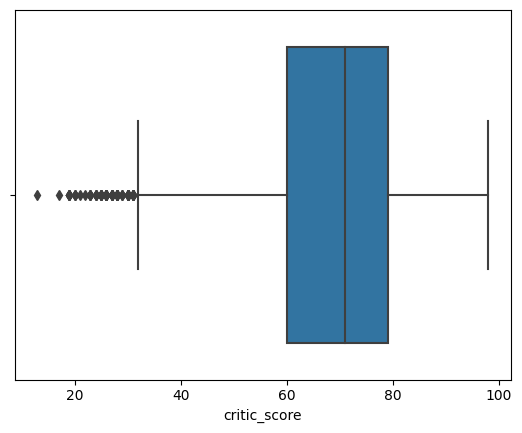

In [7]:
#Diagrama de caja para la columna 'critic_score'
sns.boxplot(games['critic_score'])

Basado en esto, debemos usar la mediana para imputar los datos ya que es menos afectada por datos sesgados o valores atípicos, lo que la hace más apropiada en este caso. La moda podría no ser tan útil aquí, ya que si la mayoría de los valores son similares o idénticos, podría haber múltiples modas o incluso ninguna.

In [8]:
#Imputación de la columna 'critic_score' con la moda, ya que tenemos valores extremos que van de 13 a 98.
median_c = games['critic_score'].median()
games['critic_score'].fillna(median_c,inplace = True)

Ahora, para imputar la columna 'user_score' debemos conocer primero el rango de nuestros datos.

In [9]:
#Cambio del tipo de datos en user_score con 'astype()'
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')

In [10]:
min_value = games['user_score'].min()
max_value = games['user_score'].max()
values_range = max_value - min_value
print('El rango para la columna user_score es:', values_range)

El rango para la columna user_score es: 9.7


Para este caso, la mediana parece ser nuestra mejor opción, debido a que tenemos una variable numérica continua y un rango demasiado abierto, por lo tanto, no podemos utilizar la media por ser sensible a valores extremos.

In [118]:
#Imputación de la columna 'user_score' con la moda.
median_u = games['user_score'].median()
games['user_score'].fillna(median_u,inplace = True)

In [12]:
#Imputación de la columna 'rating' con el valor 'no rated'
games['rating'].fillna('no rated',inplace = True)

### ELIMINACIÓN DE VALORES AUSENTES EN EL RESTO DE COLUMNAS

En este caso, debemos eliminar los valores ausentes en 'name' y en 'year_of_release', ya que, en realidad son pocos los valores que se encuentran ausentes en ellas e imputarlas no resulta conveniente.

In [13]:
#Eliminación de valores ausentes en 'name'
games = games.dropna(subset=['name'])

In [14]:
#Eliminación de valores ausentes en 'year_of_release'
games = games.dropna(subset=['year_of_release'])

<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información recaba mediante una investigación. Es muy común que cuando trabajamos con datos en la vida real, mucho de estos vengan con valores nulos que en ocasiones tendremos que completar con proxys
</div>

In [15]:
games.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


## MODIFICACIÓN EN LOS TIPOS DE DATOS:

Debido a la naturaleza de los datos en la columna 'user_score' tuve que modificar un poco el orden y cambiar sus datos antes de procesar los valores nulos porque de otra manera me daba error, sin embargo, estoy consciente de que siempre es recomendable seguir un orden y destinar una sección para cada paso al momento de realizar un proyecto. 

In [16]:
#Cambio del tipo de datos en year_of_release con 'to_datetime'
games['year_of_release'] = games['year_of_release'].astype('int')

In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## PROCESAMIENTO DE VALORES DUPLICADOS

Primero debemos analizar si tenemos filas duplicadas en nuestro DataFrame y, posteriormente, debido a la naturaleza de las columnas y la información que contienen, están permitidos los valores duplicados en cada una de ellas a excepción de la columna 'name' donde podemos llegar a tener un valor duplicado implícito que en realidad esté representando al mismo videojuego.

In [18]:
#Conteo de filas duplciadas en el DataFrame
games.duplicated().sum()

0

In [19]:
#Identificación de la información correspondiente a valores duplicados en la columna 'name'
games[games['name'].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,71.0,7.8,T
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,71.0,7.8,no rated
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.8,no rated
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.8,no rated


Como se observa, tenemos varias veces el registro del mismo juego, esto debido a que la información varía en base a la plataforma en la que fueron vendidos dichos juegos. Por lo tanto, no podemos eliminar estos valores duplicados.

## INGENIERÍA DE CARACTERÍSTICAS

Puede ser de utilidad crear una nueva columna basada en las existentes en donde contemos con el monto total de las ventas para cada videojuego, esto será util al momento de realizar nuestro análisis.

In [20]:
#Creación de la nueva columna 'total_sales'
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

## ANÁLISIS DE DATOS

En esta sección comenzaremos con el análisis y la búsqueda de los patrones que nos permitirán crear nuestros modelo predictivo y asi identificar que datos nos pueden servir para futuros juegos y poder decir con toda la precisión posible si será exitoso o no.

Un buen punto de partida puede ser echar un vistazo general a la correlación que existe entre cada una de las columnas numéricas que tenemos en nuestro DataFrame con el método 'corr()' para crear una matriz de correlación.

In [21]:
#Correlación entre columnas
games.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.092326,0.004045,-0.168477,0.037821,-0.006370,-0.183914,-0.076220
na_sales,-0.092326,1.000000,0.766546,0.451162,0.638479,0.172462,0.022507,0.941241
eu_sales,0.004045,0.766546,1.000000,0.435894,0.722679,0.181320,0.000939,0.901673
jp_sales,-0.168477,0.451162,0.435894,1.000000,0.291562,0.098674,0.088858,0.613305
other_sales,0.037821,0.638479,0.722679,0.291562,1.000000,0.170311,0.001156,0.748930
critic_score,-0.006370,0.172462,0.181320,0.098674,0.170311,1.000000,0.457077,0.189721
user_score,-0.183914,0.022507,0.000939,0.088858,0.001156,0.457077,1.000000,0.029995
total_sales,-0.076220,0.941241,0.901673,0.613305,0.748930,0.189721,0.029995,1.000000


De ésta matriz de correlación podemos sacar varios puntos a considerar:

   <u> 1. Correlación entre las ventas en NA y EU:</u> Es posible que los gustos en ambas regiones sean similares y tengan relación      lo que podría indicar que si un juego tiene éxito en una región, es probable que también lo sea en la otra.
    
   <u> 2. 'Other sales' y ventas totales:</u> Podemos observar que tienen una correlación positiva, lo que podria indicar que
    tenemos mercados emergentes o regiones menos conocidas que tienen una mayor contribución a la que pensamos. 
    
   <u> 3. Fuerte correlación entre las ventas totales y las ventas generadas en NA/EU: </u>  Con esto, podemos darnos cuenta que EU y NA  tienen la mayoria de la aportación en las ventas de cada videojuego, lo cual puede ser considerado como nuestro principal mercado debido a su tamaño y población.
    
   <u>  4. Baja correlación entre las criticas (de usaurios y criticos) y las ventas: </u>  Podemos ver que las criticas no influyen 
    en las ventas debido a su baja correlación con las ventas en cada uno de las regiones. Es posible que en las ventas 
    tengamos otros factores mas determinantes como la publicidad, el género, la plataforma o algo mas externo al propio 
    juego como los streams de las personas dedicadas a probar y jugar nuevos lanzamientos frente a su audiencia en directo.
    
   <u>  5. Las criticas de los usuarios y de los criticos tienen una fuerte correlación </u>  por lo que podemos concluir que suelen 
    ser similares y que posiblemente una influya en la otra.

### JUEGOS LANZADOS POR AÑO

In [22]:
#Agrupación para obtener los juegos lanzados por cada año ordenados de mayor a menor conteo
games_per_year = games.groupby('year_of_release')['name'].nunique().sort_values(ascending = False)

#Conversión de la Serie en un DataFrame
games_per_year_df = pd.DataFrame(games_per_year)

#Reseteo de índices
games_per_year_df.reset_index(inplace = True)

#Cambio del nombre de la segunda columna a 'games_released'
games_per_year_df.rename(columns = {'name':'games_released'}, inplace = True)

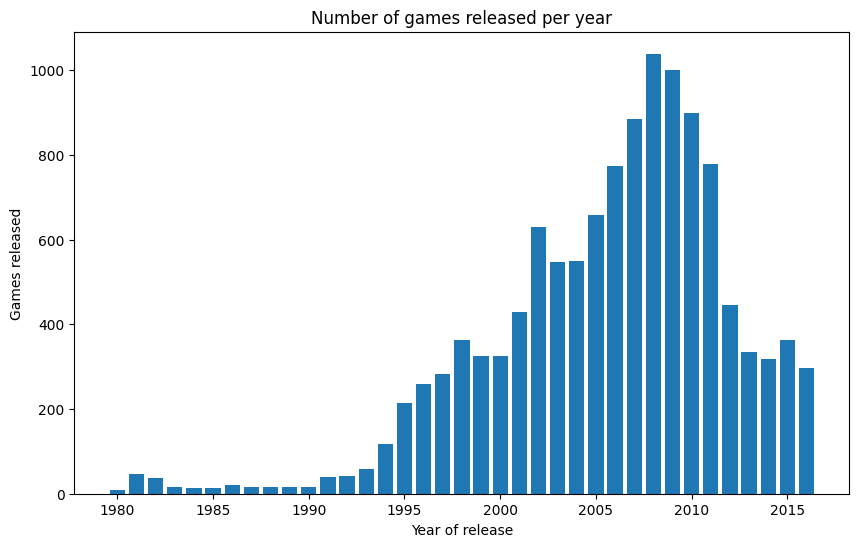

In [23]:
#Grafico de barras para visualizar los juegos lanzados por año

#Tamaño del gráfico
plt.figure(figsize = (10,6)) 

#Creación del gráfico, en 'x' tenemos el año de lanzamiento, mientras que en 'y' tenemos los juegos lanzados
plt.bar(games_per_year_df['year_of_release'], games_per_year_df['games_released'])

#Etiqueta para el eje 'x'
plt.xlabel('Year of release')

#Etiqueta para el eje 'y'
plt.ylabel('Games released')

#Título del gráfico
plt.title('Number of games released per year')

#Mostrar gráfico
plt.show()

¿Son significativos todos los datos de cada periodo?

No, debido a que desde 1980 hasta 1995 tenemos muy poca información, por lo que podriamos dejarla fuera y no utilizarla para generar nuestro modelo predictivo. A partir de este año (1995) debemos considerar toda la información porque aqui es donde comienza un aumento significativo en el registro de videojuegos lanzados.

### VENTAS POR CADA PLATAFORMA

In [24]:
#Agrupación por plataforma y suma de las ventas totales de cada una
games_per_platform = games.groupby('platform')['total_sales'].sum().sort_values(ascending = False)

#Conversión de Serie a DataFrame
games_per_platform_df = pd.DataFrame(games_per_platform)

#Reseteo de índices para convertirlos a una nueva columna
games_per_platform_df.reset_index(inplace = True)

#Renombramiento de columnas
games_per_platform_df.columns = ['platform','total_sales']

#Mostrar contenido del DataFrame
games_per_platform_df

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


#### PLATAFORMAS CON MAYORES VENTAS  TODA LA HISTORIA

Las plataformas con mayores ventas son PS2, X360, PS3, Wii y DS. Con su información construiremos una distribución para las ventas de cada año.

In [25]:
#Creación del DataFrame solo con la información de las plataformas mas vendidas
best_platforms = games[games['platform'].isin(['PS2','X360','PS3'])]
best_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
...,...,...,...,...,...,...,...,...,...,...,...,...
16689,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,71.0,7.8,no rated,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.8,no rated,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,71.0,7.8,no rated,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.8,no rated,0.01


In [26]:
#Agrupación por consola y por año de 'best_platforms'
pltf_sls_per_yr = best_platforms.groupby(['platform','year_of_release'])['total_sales'].sum() 

#Conversión de Series a DataFrame
pltf_sls_per_yr_df = pd.DataFrame(pltf_sls_per_yr)

#Reseteo de índices
pltf_sls_per_yr_df.reset_index(inplace = True)

#Cambio de nombre a columnas
pltf_sls_per_yr_df.columns = ['platform','year_of_release','total_sales']

pltf_sls_per_yr_df

,platform,year_of_release,total_sales
0,PS2,2000,39.17
1,PS2,2001,166.43
2,PS2,2002,205.38
3,PS2,2003,184.31
4,PS2,2004,211.81
5,PS2,2005,160.66
6,PS2,2006,103.42
7,PS2,2007,75.99
8,PS2,2008,53.90
9,PS2,2009,26.40


In [27]:
# Utilizar pivot para reorganizar los datos
pivot_df = pltf_sls_per_yr_df.pivot(index='year_of_release', columns='platform', values='total_sales')

#Eliminar valores nulos
pivot_df.fillna(0,inplace = True)

# Mostrar el DataFrame resultant
pivot_df

platform,PS2,PS3,X360
year_of_release,,,
2000,39.17,0.00,0.00
2001,166.43,0.00,0.00
2002,205.38,0.00,0.00
2003,184.31,0.00,0.00
2004,211.81,0.00,0.00
2005,160.66,0.00,8.25
2006,103.42,20.96,51.62
2007,75.99,73.19,95.41
2008,53.90,118.52,135.26


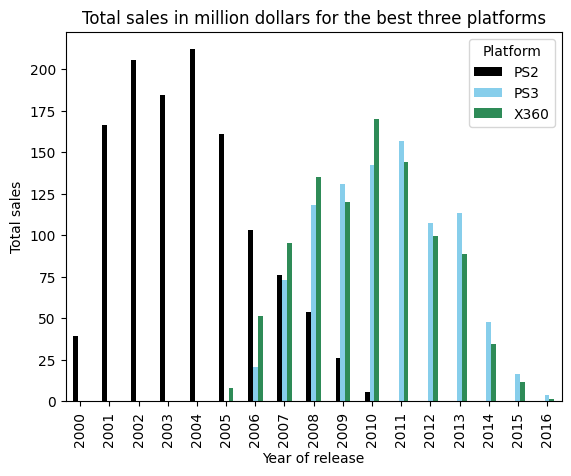

<Figure size 1000x600 with 0 Axes>

In [28]:
# Crear un gráfico de líneas para las ventas totales por año y plataforma
pivot_df.plot(kind = 'bar', color = [ 'black','skyblue', 'seagreen'])

# Personalizar el gráfico
plt.xlabel('Year of release')
plt.ylabel('Total sales')
plt.title('Total sales in million dollars for the best three platforms')
plt.legend(title='Platform')
plt.figure(figsize=(10,6))

# Mostrar el gráfico
plt.show()


#### ¿CUÁNTO TARDAN GENERALMENTE LAS NUEVAS PLATAFORMAS EN APARECER Y LAS ANTIGUAS EN DESAPARECER?

<u>Plataformas que solían ser populares y ahora ya no lo son</u>

Nuestro top 3 de plataformas con mayores ventas de videojuegos fueron PS2, PS3 y X360 que básicamente sus distribuciones tienen el mismo comportamiento.

    1. Las tres gráficas alcanzan un primer pico y al año siguiente bajan sus ventas para posteriormente presentar un nuevo aumento para finalmente solo ir a la baja. 
    
    2. Las consolas de PlayStation (PS2 y PS3) solamente tardaron dos años en alcanzar su primer pico de ventas después de dos años de su lanzamiento mientras que X360 lo alcanza despues de 6 años. 
    
    3. Cuando PS3 aparece, las ventas en PS2 comienzan a disminuir significatviamente debido a que cuando una consola nueva aparece, las desarroladoras de videjuegos van adapatando sus lanzamientos a las nuevas plataformas por su mejoría en gráficos (entre otras cosas nuevas que ofrecen).
    
    4. X360 y PS3 están en el mercado básicamente el mismo tiempo compitiendo en el mercado por los videojuegos, sin embargo, es claro que al inicio X360 supera a PS3 año con año hasta el 2011, año en el que PS3 alcanza su pico máximo de ventas (un año despues del record de X360).
    
    5. Las 3 plataformas tienen un 'periodo de vida' de 10 años aproximadamente pero aproximadamente 5 años posteriores a su lanzamiento sale una nueva para que después de esto, la antigua plataforma termine desapareciendo.

Considerando los puntos anteriores podemos concluir que las plataformas mas exitosas durante su periodo de vida (10 años aproximadamente) en el mercado generan un aumento constante en sus ventas hasta que se presenta una disminución para posteriormente alcanzar su punto máximo y comenzar a descender en los años posteriores hasta desaparecer debido a la aparición de nuevas consolas porque los desarrolladores se van adaptando a ellas hasta que llega el punto en el que ya no hay mas videojuegos lanzados para plataformas antiguas, siguiendo asi un comportamiento predecible.

En el caso de plataformas 'rivales' se puede presentar una disminución en las ventas debido al mercado compartido con las demas marcas, sin embargo, algo que debemos tener en cuenta para estos casos es que los aumentos seguramente están relacionados con los lanzamientos exclusivos para cada plataforma o incluso, los beneficios que tienen el obtener membresías para cada una de ellas.

### DATOS PARA EL MODELO DEL 2017

Si bien es cierto que quitar información puede causar que no identifiquemos cosas que en el pasado funcionaron para determinar que un videojuego tenga éxito o no frente a la audiencia, para nuestro contexto no es tan importante considerarlo, ya que no trabajamos para una empresa desarrolladora si no para una plataforma de solamente venta.
considerando los puntos anteriores, la información que nos servirá en el modelo predictivo para el 2017 será aquella que tenemos disponible apartir del 2006 por ser la más vigente y asi poder realizar predicciones mas acertadas sobre las preferencias y gustos actualizadas de nuestros clientes.

In [29]:
#Creación del DataFrame considerando los datos a partir del 2006
ltst_games_info = games[games['year_of_release']>=2006]
ltst_games_info

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,71.0,7.8,no rated,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.8,no rated,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.8,no rated,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.8,no rated,0.01


### PLATAFORMAS LÍDERES EN VENTAS (DATOS PARA MODELO 2017)

Considerando la información mas reciente (2006 a la mas actual) debemos utilizar el dataset 'ltst_games_info' para generar uno nuevo donde tengamos a nuestras plataformas lider en ventas de videojuegos

In [30]:
#Agrupación de datos por plataforma y suma de las ventas totales
successful_pltfs = ltst_games_info.groupby('platform')['total_sales'].sum().sort_values(ascending = False)

#Convserión de Serie a DataSet
successful_pltfs_df = pd.DataFrame(successful_pltfs)

#Reseteo de índices
successful_pltfs_df.reset_index(inplace = True)

#Mostrar dataset
successful_pltfs_df

,platform,total_sales
0,X360,952.99
1,PS3,931.34
2,Wii,891.18
3,DS,655.35
4,PS4,314.14
5,PS2,265.80
6,3DS,257.81
7,PSP,238.63
8,PC,163.42
9,XOne,159.32


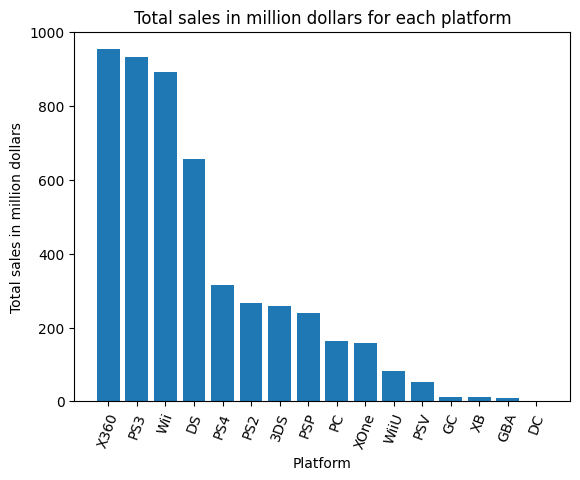

<Figure size 1000x600 with 0 Axes>

In [31]:
#Generación del gráfico de barras para la tabla 'succesful_pltfs_df'
plt.bar(successful_pltfs_df['platform'], successful_pltfs_df['total_sales'])

#Nombramiento de etiquetas para 'X' y para 'Y'
plt.xlabel('Platform')
plt.ylabel('Total sales in million dollars')

#Nombramiento del título del gráfico
plt.title('Total sales in million dollars for each platform')

#Rotación de las escalas en el eje 'X'
plt.xticks(rotation=70)

#Tamaño del gráfico
plt.figure(figsize=(10,6))

#Mostrar gráfico
plt.show()

#### ¿CUALES CRECEN Y CUÁLES SE REDUCEN?

Las principales plataformas con mas ventas son X360, PS3 y Wii, sin embargo, dado que en la gráfica generada en base a 'pltf_sls_per_yr_df' X360 y PS3 mostrarán el mismo comportamiento porque sus ventas comenzaron en 2006. Por lo que tambien vamos a considerar la cuarta posición aunque ya comienza a existir una diferencia considerable en cuanto al dinero generado por los videojuegos. Generaremos dos gráficas de ventas por año y por plataforma, para la primera y segunda posición y una más para la tercera y cuarta.

##### GRÁFICA PARA LAS DOS PRIMERAS POSICIONES DE PLATAFORMAS CON MAS VENTAS

In [32]:
#Creación del DataFrame solo con la información de las dos plataformas mas vendidas
best_two_platforms = ltst_games_info[ltst_games_info['platform'].isin(['X360','PS3'])]
best_two_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,71.0,7.8,no rated,0.01
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,71.0,7.8,no rated,0.00
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.8,no rated,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.8,no rated,0.01


In [33]:
#Agrupación por consola y por año de 'best_two_platforms'
fst_scnd_pltf_sls_per_yr = best_two_platforms.groupby(['platform','year_of_release'])['total_sales'].sum() 

#Conversión de Series a DataFrame
fst_scnd_pltf_sls_per_yr_df = pd.DataFrame(fst_scnd_pltf_sls_per_yr)

#Reseteo de índices
fst_scnd_pltf_sls_per_yr_df.reset_index(inplace = True)

#Cambio de nombre a columnas
fst_scnd_pltf_sls_per_yr_df.columns = ['platform','year_of_release','total_sales']

fst_scnd_pltf_sls_per_yr_df

,platform,year_of_release,total_sales
0,PS3,2006,20.96
1,PS3,2007,73.19
2,PS3,2008,118.52
3,PS3,2009,130.93
4,PS3,2010,142.17
5,PS3,2011,156.78
6,PS3,2012,107.36
7,PS3,2013,113.25
8,PS3,2014,47.76
9,PS3,2015,16.82


In [34]:
# Utilizar pivot para reorganizar los datos
second_pivot_df = fst_scnd_pltf_sls_per_yr_df.pivot(index='year_of_release', columns='platform', values='total_sales')

#Eliminar valores nulos
second_pivot_df.fillna(0,inplace = True)

# Mostrar el DataFrame resultant
second_pivot_df

platform,PS3,X360
year_of_release,,
2006,20.96,51.62
2007,73.19,95.41
2008,118.52,135.26
2009,130.93,120.29
2010,142.17,170.03
2011,156.78,143.84
2012,107.36,99.74
2013,113.25,88.58
2014,47.76,34.74


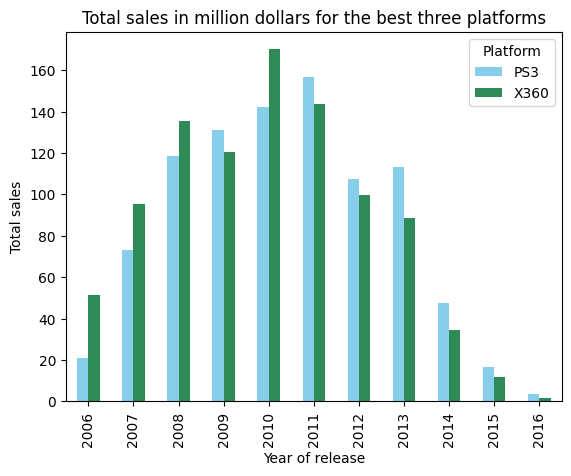

<Figure size 1000x600 with 0 Axes>

In [35]:
#Crear un gráfico de líneas para las ventas totales por año y plataforma
second_pivot_df.plot(kind = 'bar', color = ['skyblue', 'seagreen'])

#Personalizar el gráfico
plt.xlabel('Year of release')
plt.ylabel('Total sales')
plt.title('Total sales in million dollars for the best three platforms')
plt.legend(title='Platform')
plt.figure(figsize=(10,6))

#Mostrar el gráfico
plt.show()

##### GRÁFICAS PARA LAS POSICIONES 3 Y 4 DE LAS PLATAFORMAS CON MAS VENTAS

In [36]:
#Creación del DataFrame solo con la información de las dos plataformas mas vendidas
thrd_fth_platforms = ltst_games_info[ltst_games_info['platform'].isin(['Wii','DS'])]
thrd_fth_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16685,Help Wanted: 50 Wacky Jobs (jp sales),Wii,2008,Simulation,0.00,0.00,0.01,0.00,71.0,7.8,no rated,0.01
16686,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008,Racing,0.00,0.00,0.01,0.00,71.0,7.8,no rated,0.01
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,48.0,7.8,E,0.01
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,71.0,7.8,no rated,0.01


In [37]:
#Agrupación por consola y por año de 'best_two_platforms'
thrd_fth_pltfs_sls_per_yr = thrd_fth_platforms.groupby(['platform','year_of_release'])['total_sales'].sum() 

#Conversión de Series a DataFrame
thrd_fth_pltfs_sls_per_yr_df = pd.DataFrame(thrd_fth_pltfs_sls_per_yr)

#Reseteo de índices
thrd_fth_pltfs_sls_per_yr_df.reset_index(inplace = True)

#Cambio de nombre a columnas
thrd_fth_pltfs_sls_per_yr_df.columns = ['platform','year_of_release','total_sales']

thrd_fth_pltfs_sls_per_yr_df

,platform,year_of_release,total_sales
0,DS,2006,119.81
1,DS,2007,146.94
2,DS,2008,145.31
3,DS,2009,119.54
4,DS,2010,85.02
5,DS,2011,26.18
6,DS,2012,11.01
7,DS,2013,1.54
8,Wii,2006,137.15
9,Wii,2007,152.77


In [38]:
# Utilizar pivot para reorganizar los datos
third_pivot_df = thrd_fth_pltfs_sls_per_yr_df.pivot(index='year_of_release', columns='platform', values='total_sales')

#Eliminar valores nulos
third_pivot_df.fillna(0,inplace = True)

# Mostrar el DataFrame resultant
third_pivot_df

platform,DS,Wii
year_of_release,,
2006,119.81,137.15
2007,146.94,152.77
2008,145.31,171.32
2009,119.54,206.97
2010,85.02,127.95
2011,26.18,59.65
2012,11.01,21.71
2013,1.54,8.59
2014,0.00,3.75


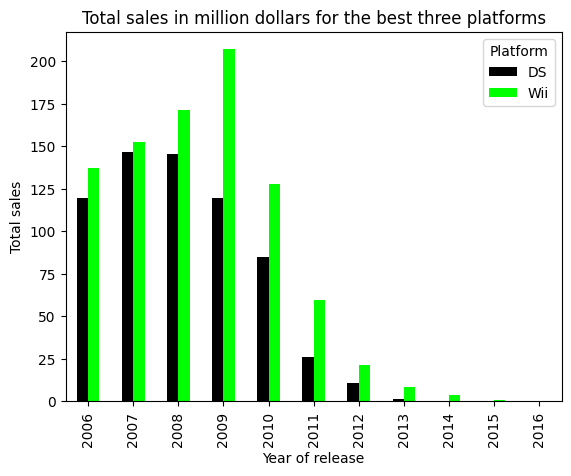

<Figure size 1000x600 with 0 Axes>

In [39]:
#Crear un gráfico de líneas para las ventas totales por año y plataforma
third_pivot_df.plot(kind = 'bar', color = ['black', 'lime'])

#Personalizar el gráfico
plt.xlabel('Year of release')
plt.ylabel('Total sales')
plt.title('Total sales in million dollars for the best three platforms')
plt.legend(title='Platform')
plt.figure(figsize=(10,6))

#Mostrar el gráfico
plt.show()

Como podemos observar a pesar de que en el top 4 pertenece a plataformas con un lanzamiento reciente en 2006, nuestras dos primeras posiciones (PS3 y X360) dominaron con claridad el mercado y fueron mas constantes en sus ventas a comparación de las plataformas pertenecientes a las posiciones tres y cuatro (Wii y DS). Cabe destacar que mientras Wii y DS estaban prácticamente desaparecidas, nuestro top 2 seguía generando ventas en sus plataformas lo cual nos habla de la clara preferencia que siguen teniendo los usuarios hacia estas dos plataformas a pesar de que ya cuentan con la siguiente generación de dichas plataformas en el mercado. Esto podría deberse a factores como la calidad de los juegos, la comunidad de jugadores o la retrocompatibilidad.

##### ¿SON SIGNIFICATIVAS LAS DIFERENCIAS ENTRE LAS PLATAFORMAS MAS VENDIDAS?

Para responder esta pregunta, debemos generar un DataFrame que contenga la información de cada una de las 4
plataformas con más ventas a partir del 2006 y asi poder generar un diagrama de caja para cada una de ellas.

In [40]:
#Creación del dataset para PS3 desde 2006
PS3_df = ltst_games_info[ltst_games_info['platform'] == 'PS3'].sort_values(by='total_sales',ascending = True)
PS3_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,71.0,7.8,no rated,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.8,no rated,0.01
15880,Turbo: Super Stunt Squad,PS3,2013,Sports,0.00,0.01,0.00,0.00,38.0,7.8,E,0.01
15891,Rugby League Live 3,PS3,2015,Action,0.00,0.01,0.00,0.00,71.0,7.8,no rated,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.8,no rated,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [41]:
#Creación del dataset para X360 desde 2006
X360_df = ltst_games_info[ltst_games_info['platform'] == 'X360'].sort_values(by='total_sales',ascending = True)
X360_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.8,no rated,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,71.0,5.1,E10+,0.01
15833,Painkiller: Hell & Damnation,X360,2013,Shooter,0.00,0.01,0.00,0.00,71.0,7.8,no rated,0.01
16102,Tom Clancy's Ghost Recon Advanced Warfighter ...,X360,2006,Shooter,0.00,0.00,0.01,0.00,71.0,7.8,no rated,0.01
16109,Winter Sports 3: The Great Tournament,X360,2010,Sports,0.00,0.01,0.00,0.00,71.0,7.8,E,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27


In [42]:
#Creación del dataset para PS3 desde 2006
Wii_df = ltst_games_info[ltst_games_info['platform'] == 'Wii'].sort_values(by='total_sales',ascending = True)
Wii_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16686,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008,Racing,0.00,0.00,0.01,0.00,71.0,7.8,no rated,0.01
16249,SoulCalibur Legends (JP sales),Wii,2007,Action,0.00,0.00,0.01,0.00,71.0,7.8,no rated,0.01
16195,Super PickUps,Wii,2009,Racing,0.01,0.00,0.00,0.00,71.0,7.8,E,0.01
16189,Major Dream: Major Wii Nagero! Gyroball!!,Wii,2008,Sports,0.00,0.00,0.01,0.00,71.0,7.8,no rated,0.01
16144,Penguins of Madagascar,Wii,2014,Action,0.00,0.01,0.00,0.00,71.0,7.8,E,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


In [43]:
#Creación del dataset para PS3 desde 2006
DS_df = ltst_games_info[ltst_games_info['platform'] == 'DS'].sort_values(by='total_sales',ascending = True)
DS_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,71.0,7.8,E,0.01
16145,Magic Encyclopedia: Moonlight,DS,2010,Misc,0.00,0.01,0.00,0.00,71.0,7.8,no rated,0.01
16165,Diary Girl,DS,2008,Misc,0.01,0.00,0.00,0.00,71.0,7.8,E,0.01
16170,Best Of Tests,DS,2008,Puzzle,0.01,0.00,0.00,0.00,71.0,7.8,no rated,0.01
16172,Honda ATV Fever,DS,2010,Racing,0.01,0.00,0.00,0.00,71.0,7.8,E,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
74,Mario Party DS,DS,2007,Misc,4.40,1.85,1.98,0.68,72.0,7.8,E,8.91
46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,4.34,2.71,3.96,0.76,71.0,7.8,no rated,11.77
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,71.0,7.8,no rated,15.13
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,71.0,7.8,no rated,18.24


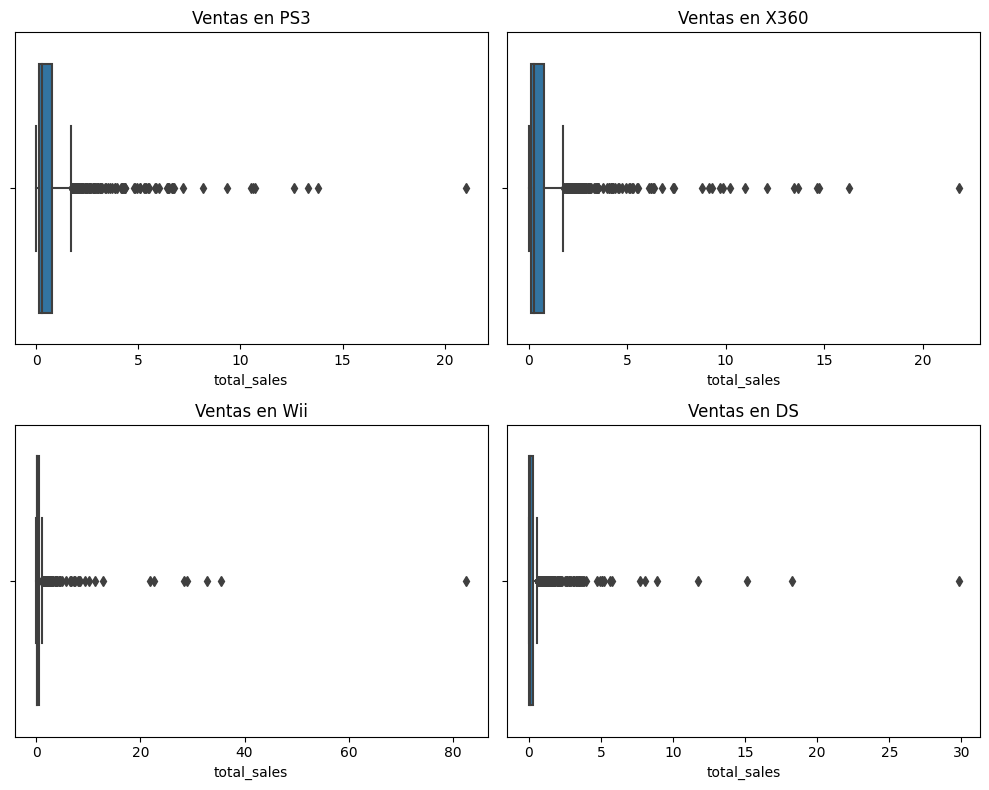

In [44]:
# Datos de ventas globales por plataforma (reemplaza con tus propios datos)
ventas_ps3 = PS3_df['total_sales']
ventas_x360 = X360_df['total_sales']
ventas_wii = Wii_df['total_sales']
ventas_ds = DS_df['total_sales']

# Crear subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Gráfico de caja para PS3
sns.boxplot(x=ventas_ps3, ax=axes[0, 0])
axes[0, 0].set_title('Ventas en PS3')

# Gráfico de caja para X360
sns.boxplot(x=ventas_x360, ax=axes[0, 1])
axes[0, 1].set_title('Ventas en X360')

# Gráfico de caja para Wii
sns.boxplot(x=ventas_wii, ax=axes[1, 0])
axes[1, 0].set_title('Ventas en Wii')

# Gráfico de caja para DS
sns.boxplot(x=ventas_ds, ax=axes[1, 1])
axes[1, 1].set_title('Ventas en DS')

plt.tight_layout()  # Ajustar el diseño
plt.show()



Dado que tenemos gráficos de cajas un tanto parecidos entre sí, y que las medias de los cuatro plataformas son cercanas entre sí, observamos que PS3 Y X360 tienen una distribución parecida en cuanto a la venta de videojuegos, asi como Wii y DS. Para determinar si son significativas las diferencias en las ventas entre las diferentes plataformas debemos comparar principalemente, mediante un análisis estadístico a:

  <u> 1. PS3 vs X360: </u> Son las dos plataformas que históricamente han representado una gran rivalidad en el mercado de los videojuegos por los títulos que comparten y el modelo similar en sus suscripciones, exclusivos y dimensiones de plataforma.
    
  <u> 2. Wii vs DS: </u> Ésta comparación se debe a que, a pesar de que Wii es una consola 'estática' y 'DS' es portatil, al compararlas podemos obtener información sobre si los usuarios de la misma compañia (Nintendo) prefieren ampliamente el sacrificar gráficos y algunos videojuegos por una mayor movilidad de la plataforma, debido a que Wii tiene dimensiones mas accesibles y de las tres es la más parecida a una consola portatil por sus dimensiones, lo cual facilita su transporte.
    
  <u> 3. Wii vs PS3: </u> Debemos entender si las ventas son significativas entre consolas 'estáticas'. Si encontramos una diferencia significativa, podríamos considerar estrategias específicas para cada plataforma.
    
  <u> 4. Wii vs X360: </u> Debemos entender si las ventas son significativas entre consolas 'estáticas'. Si encontramos una diferencia significativa, podríamos considerar estrategias específicas para cada plataforma.
 

Para poder mantener el orden en el proyecto, primero generemos las muestras que usaremos para cada población. Dado que los DataFrame que generamos para crear los diagramas de caja tienen un mínimo de 1200 datos, crearemos una población estadística de 1000 datos para cada una de ellas y utilizaremos un nivel de significancia del 5%.

Para todos los casos tendremos que:

                                        H0: Las medias entre poblaciones son iguales
                                        H1: Las medias entre poblaciones son significativamente diferentes
                                       

In [45]:
#Muestra para X360
X360_sample = ventas_x360.sample(1000, random_state = 1)

#Muestra para PS3
PS3_sample = ventas_ps3.sample(1000, random_state = 1)

#Muestra para Wii
Wii_sample = ventas_wii.sample(1000, random_state = 1)

#Muestra para DS
DS_sample = ventas_ds.sample(1000, random_state = 1)

#Definición de alpha
alpha = 0.05

###### PS3 vs X360

In [46]:
#Realizar la prueba
results_psx = st.ttest_ind(X360_sample, PS3_sample)

#Imprimir el valor p de la prueba
print('Valor p:',results_psx.pvalue)

#Comparación del valor p con alpha
if results_psx.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 0.08813200511555447
No podemos rechazar la hipótesis nula


Al NO poder rechazar la hipótesis nula, concluimos que entre PS3 y X360 NO existe diferencia significativa entre las ventas totales de videojuegos, ya que ésta diferencia podría deberse a la aleatoriedad de los mismos datos.

###### Wii vs DS

In [47]:
#Realizar la prueba
results_wds = st.ttest_ind(DS_sample, Wii_sample)

#Imprimir el valor p de la prueba
print('Valor p:',results_wds.pvalue)

#Comparación del valor p con alpha
if results_wds.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 1.0451129036508712e-05
Rechazamos la hipótesis nula


Al rechazar la hipótesis nula podemos concluir que las diferencias observadas entre las ventas de Wii y DS no se deben únicamente a la aleatoriedad de los datos. Hay una diferencia real y significativa entre las poblaciones.

###### x360 vs Wii

In [48]:
#Realizar la prueba
results_xwi = st.ttest_ind(X360_sample, Wii_sample)

#Imprimir el valor p de la prueba
print('Valor p:',results_xwi.pvalue)

#Comparación del valor p con alpha
if results_xwi.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 0.005238830594224143
Rechazamos la hipótesis nula


Al rechazar la hipótesis nula podemos concluir que las diferencias observadas entre las ventas de Wii y X360 no se deben únicamente a la aleatoriedad de los datos. Hay una diferencia real y significativa entre las poblaciones.

###### PS3 vs Wii

In [49]:
#Realizar la prueba
results_psw = st.ttest_ind(PS3_sample, Wii_sample)

#Imprimir el valor p de la prueba
print('Valor p:',results_psw.pvalue)

#Comparación del valor p con alpha
if results_psw.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 0.11963465564130732
No podemos rechazar la hipótesis nula


Al NO poder rechazar la hipótesis nula, concluimos que entre PS3 y Wii NO existe diferencia significativa entre las ventas totales de videojuegos, ya que ésta diferencia podría deberse a la aleatoriedad de los mismos datos.

Ahora si podemos dar respuesta a la pregunta inicial de si son significativas las diferencias entre las ventas de las diferentes plataformas y es que a pesar de que en la gráfica inicial donde tenemos las ventas totales por plataforma podriamos pensar que las diferencias comienzan a ser significativas después de la tercera posición, nuestro análisis estadístico ha demostrado que no. Siendo asi que:

    1. Las ventas entre los dos primeros lugares (X360 vs PS3) NO muestran diferencias significativas, ni tampoco la segunda 
    posición (PS3) contra la tercera (Wii), sin embargo, al comparar el primer lugar (X360) con la tercera (Wii) observamos que la diferencias comienzan a ser significativas a partir de éste punto. Gracias a esto podemos concluir que un 
    videojuego que se estrena para X360 o PS3 tiene mas posibilidades de ser exitoso en las ventas.
    
    2. En la comparación del tercer lugar en ventas (Wii) contra el cuarto lugar (DS) tambien observamos que existe una 
    diferencia significativa en sus ventas a pesar de que ambas plataformas pertenecen a la misma compañia (Nintendo), 
    por lo que tambien podemos concluir que las personas fieles a ella prefieren una plataforma estática sobre una portatil 
    debido a la experiencia de juego y el catálogo disponible de videojuegos.
 

### VENTAS Y CRITICAS 

Ahora veamos como afectan las críticas de usuarios y profesionales a las ventas de un videojuego para la plataforma PS3 creando un gráfico de dispersión y calculando la correlación entre éstas variables.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

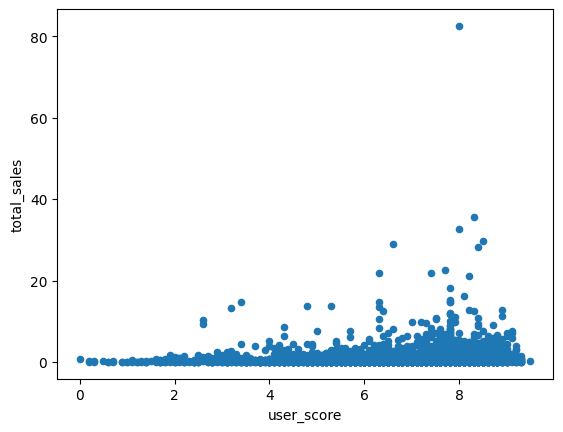

In [50]:
#Gráfico de dispersión entre reseñas de usaurios y ventas
ltst_games_info.plot.scatter(x = 'user_score', y = 'total_sales')

In [51]:
usc_sls_corr = ltst_games_info['user_score'].corr(ltst_games_info['total_sales'])
usc_sls_corr

-0.005881672661357523

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

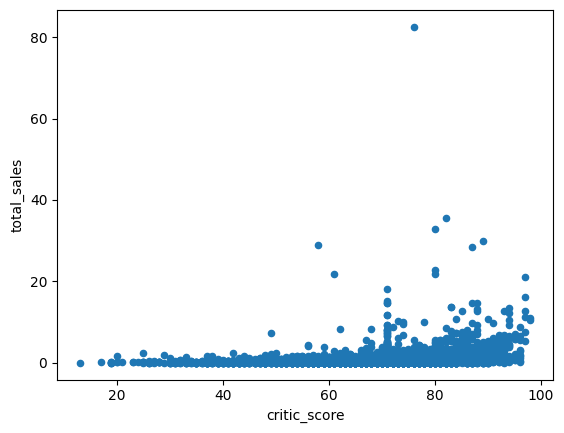

In [52]:
#Gráfico de dispersión entre reseñas de usaurios y ventas
ltst_games_info.plot.scatter(x = 'critic_score', y = 'total_sales')

In [53]:
csc_sls_corr = ltst_games_info['critic_score'].corr(ltst_games_info['total_sales'])
csc_sls_corr

0.19663895768110753

Como podemos observar, ninguna de las reseñas generadas por usuarios o por profesionales tienen un impacto en las ventas de los videojuegos, por lo que podemos considerar que éstas dependen de otros factores como el marketing, la expectativa generada al rededor del mismo, si es secuela o no de algún otro juego exitoso o si pertenece a algun género en específico. 

### VENTAS DE JUEGOS POR PLATAFORMA

Ahora comparemos los juegos lanzados para diferentes plataformas, para esto consideraremos solamente a nuestras dos primeras plataformas lideres en ventas (X360 y PS3) y tomaremos los primeros 5 videojuegos mas vendidos.

In [54]:
#Creación del dataset para juegos estrenados en X360 y PS3
x360_ps3_games = ltst_games_info[ltst_games_info['platform'].isin(['X360','PS3'])]

In [55]:
#Agrupación por juego y por plataforma para las ventas totales de cada uno
games_per_pltf = x360_ps3_games.groupby(['name','platform'])['total_sales'].sum()

#Conversión de Series a DataFrame
games_per_pltf = pd.DataFrame(games_per_pltf).sort_values(by = 'total_sales', ascending = False)

#Reseteo de índices
games_per_pltf.reset_index(inplace = True)

#Mostrar DataFrame
games_per_pltf.head(20)

,name,platform,total_sales
0,Kinect Adventures!,X360,21.82
1,Grand Theft Auto V,PS3,21.05
2,Grand Theft Auto V,X360,16.27
3,Call of Duty: Modern Warfare 3,X360,14.73
4,Call of Duty: Black Ops,X360,14.62
5,Call of Duty: Black Ops II,PS3,13.79
6,Call of Duty: Black Ops II,X360,13.68
7,Call of Duty: Modern Warfare 2,X360,13.47
8,Call of Duty: Modern Warfare 3,PS3,13.33
9,Call of Duty: Black Ops,PS3,12.63


In [56]:
#Identificación de los juegos estrenados en ambas plataformas (elementos duplicados en la columna 'name')
games_per_pltf[games_per_pltf['name'].duplicated()].head()

,name,platform,total_sales
2,Grand Theft Auto V,X360,16.27
6,Call of Duty: Black Ops II,X360,13.68
8,Call of Duty: Modern Warfare 3,PS3,13.33
9,Call of Duty: Black Ops,PS3,12.63
13,Call of Duty: Modern Warfare 2,PS3,10.61


Ahora que identificamos los primeros lugares, podemos graficar solamente las ventas para cada uno de ellos en las diferentes plataformas

In [57]:
#DataFrame con la información de los 5 juegos mas vendidos
best_sellers = games_per_pltf[games_per_pltf['name'].isin(['Grand Theft Auto V','Call of Duty: Black Ops II',
                                                          'Call of Duty: Modern Warfare 3','Call of Duty: Black Ops',
                                                          'Call of Duty: Modern Warfare 2'])]
#Agrupación por videojuego y plataforma, suma de ventas totales
gpd_best_sellers = best_sellers.groupby(['name','platform'])['total_sales'].sum()

In [58]:
#Convserión a DataFrame
gpd_best_sellers = pd.DataFrame(gpd_best_sellers)

#Reseteo de índices
gpd_best_sellers.reset_index(inplace = True)

#Mostrar nuevo Dataset
gpd_best_sellers

,name,platform,total_sales
0,Call of Duty: Black Ops,PS3,12.63
1,Call of Duty: Black Ops,X360,14.62
2,Call of Duty: Black Ops II,PS3,13.79
3,Call of Duty: Black Ops II,X360,13.68
4,Call of Duty: Modern Warfare 2,PS3,10.61
5,Call of Duty: Modern Warfare 2,X360,13.47
6,Call of Duty: Modern Warfare 3,PS3,13.33
7,Call of Duty: Modern Warfare 3,X360,14.73
8,Grand Theft Auto V,PS3,21.05
9,Grand Theft Auto V,X360,16.27


In [59]:
# Utilizar pivot para reorganizar los datos
pivot_best_sellers = gpd_best_sellers.pivot(index='name', columns='platform', values='total_sales')

#Eliminar valores nulos
pivot_best_sellers.fillna(0,inplace = True)

# Mostrar el DataFrame resultant
pivot_best_sellers

platform,PS3,X360
name,,
Call of Duty: Black Ops,12.63,14.62
Call of Duty: Black Ops II,13.79,13.68
Call of Duty: Modern Warfare 2,10.61,13.47
Call of Duty: Modern Warfare 3,13.33,14.73
Grand Theft Auto V,21.05,16.27


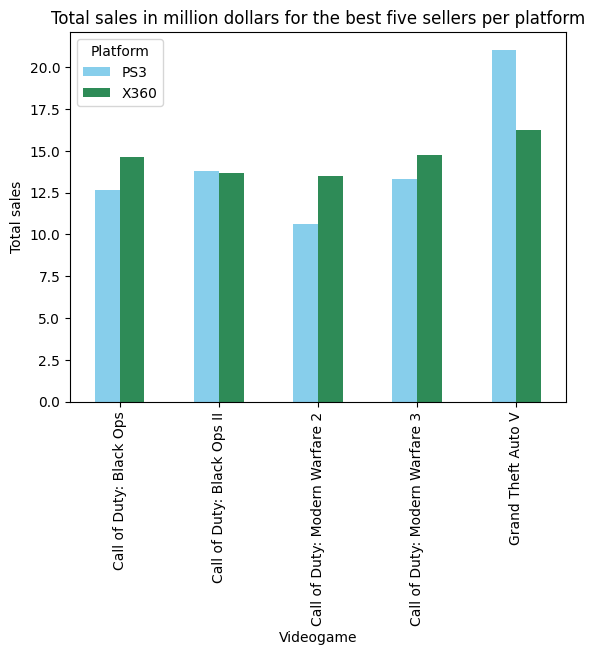

<Figure size 1000x600 with 0 Axes>

In [60]:
#Crear un gráfico de líneas para las ventas totales por año y plataforma
pivot_best_sellers.plot(kind = 'bar', color = ['skyblue', 'seagreen'])

#Personalizar el gráfico
plt.xlabel('Videogame')
plt.ylabel('Total sales')
plt.title('Total sales in million dollars for the best five sellers per platform')
plt.legend(title='Platform')
plt.figure(figsize=(10,6))

#Mostrar el gráfico
plt.show()

Podemos observar que X360 fue ligeramente superior a PS3 en 4 de los 5 juegos mas vendidos para ambas plataformas, lo cual indica una clara preferencia de los usuarios a comprar juegos del estilo de "Call of Duty" para ésta plataforma, probablemente a los servicios que X360 ofrece para videojuegos online, a su rendimiento y estructura para éste tipo de juegos, mientras que para juegos que pueden jugarse 'localmente' como 'GTA V' puede que tengamos más éxito en PlayStation. Sin embargo debemos tener en cuenta que las preferencias de los jugadores pueden variar según la región geográfica y el momento en que se realizaron las ventas.

### JUEGOS POR CADA GÉNERO

In [61]:
x = ltst_games_info.groupby('genre')['genre'].sum()

In [62]:
#Agrupación de datos por género
genre_df= ltst_games_info.groupby('genre')['total_sales'].sum()

#Convserión a DataFrame
genre_df = pd.DataFrame(genre_df).sort_values(by = 'total_sales', ascending = False)

#Reseteo de índices
genre_df.reset_index(inplace = True)

#Mostrar nuevo Dataset
genre_df


,genre,total_sales
0,Action,1116.65
1,Sports,793.85
2,Shooter,717.04
3,Misc,554.86
4,Role-Playing,522.40
5,Racing,299.00
6,Platform,279.74
7,Simulation,220.65
8,Fighting,188.42
9,Adventure,141.35


<AxesSubplot:title={'center':'Total sales in million dollars per genre'}, xlabel='Genre', ylabel='Total sales'>

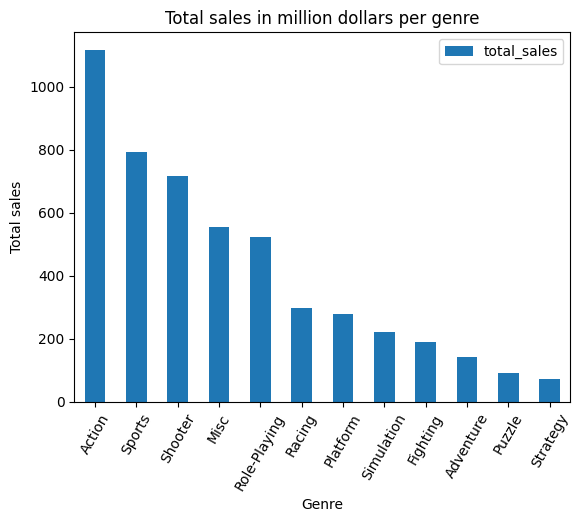

In [63]:
genre_df.plot(x = 'genre', 
              y = 'total_sales',
              xlabel = 'Genre',
              ylabel = 'Total sales',
              kind='bar',
             title = 'Total sales in million dollars per genre',
              rot = 60
             )

Como observamos los videojuegos mas rentables pertenecen al género de 'Action' el cual se dispara bastante en comparación al segundo lugar que son los juegos de la categoria 'Sports' y a la categoría 'Shooter' que tienen ventas similares. Sin embargo, debemos considerar que no todos los géneros tienen la misma cantidad de registros y que existen juegos increiblemente exitosos en varios géneros, lo cual puede crear un sesgo en nuestra conclusión, para reducir esto debemos considerar cuantos millones de dolares genera cada categoría de videojuegos por registro para tener una mejor panorámica sobre su rendimiento.

Para realizar éste nuevo análisis debemos generar una nueva columna en 'genre_df' donde obtengamos el número de registros para cada uno de los géneros:

In [64]:
#Creación de una Serie para el conteo de registros para cada categoría de vieojuegos
registers = ltst_games_info.groupby('genre')['name'].count()

#Mostrar Serie
registers

genre
Action          2382
Adventure       1023
Fighting         413
Misc            1253
Platform         340
Puzzle           366
Racing           562
Role-Playing     996
Shooter          737
Simulation       606
Sports          1262
Strategy         393
Name: name, dtype: int64

In [65]:
#Unir el dataset 'genre_df' con la serie 'registers'
mgd_genre_df = genre_df.merge(registers, on = 'genre')

#Renombramiento de la columna agregada
mgd_genre_df.rename(columns = {'name':'sales_registers'}, inplace = True)

#Mostrar el dataset para asegurarnos de los cambios 
mgd_genre_df

,genre,total_sales,sales_registers
0,Action,1116.65,2382
1,Sports,793.85,1262
2,Shooter,717.04,737
3,Misc,554.86,1253
4,Role-Playing,522.40,996
5,Racing,299.00,562
6,Platform,279.74,340
7,Simulation,220.65,606
8,Fighting,188.42,413
9,Adventure,141.35,1023


Ahora debemos generar una nueva columna que contenga la proporción entre las ventas totales y el número de registros de venta para los diferentes géneros.

In [66]:
#Creación de una nueva columna llamada 'sales_rate' en mgd_genre_df
mgd_genre_df['sales_rate'] = (mgd_genre_df['total_sales'] / mgd_genre_df['sales_registers'])

#Mostrar dataset
mgd_genre_df.sort_values(by = 'sales_rate', ascending = False)

,genre,total_sales,sales_registers,sales_rate
2,Shooter,717.04,737,0.972917
6,Platform,279.74,340,0.822765
1,Sports,793.85,1262,0.629041
5,Racing,299.00,562,0.532028
4,Role-Playing,522.40,996,0.524498
0,Action,1116.65,2382,0.468787
8,Fighting,188.42,413,0.456223
3,Misc,554.86,1253,0.442825
7,Simulation,220.65,606,0.364109
10,Puzzle,89.92,366,0.245683


Una vez realizado esto, debemos filtrar nuestra nueva tabla para solamente visualizar nuestros 5 géneros mas vendidos y verificar cuales son en realidad los mas rentables.

#### VIDEOJUEGOS MÁS RENTABLES

In [67]:
#Filtrar dataset 'mgd_genre_df' de acuerdo a las 5 categorias mas vendidas en 'genre_df', ordenado en base a 'sales_rate'
top_genres = mgd_genre_df[mgd_genre_df['genre'].isin(genre_df['genre'].head())].sort_values(by='sales_rate', 
                                                                                            ascending = False)
#Mostrar dataset filtrado
top_genres

,genre,total_sales,sales_registers,sales_rate
2,Shooter,717.04,737,0.972917
1,Sports,793.85,1262,0.629041
4,Role-Playing,522.40,996,0.524498
0,Action,1116.65,2382,0.468787
3,Misc,554.86,1253,0.442825


<AxesSubplot:title={'center':'Sales rate for the top 5 best sellers'}, xlabel='Genre', ylabel='Sales rate'>

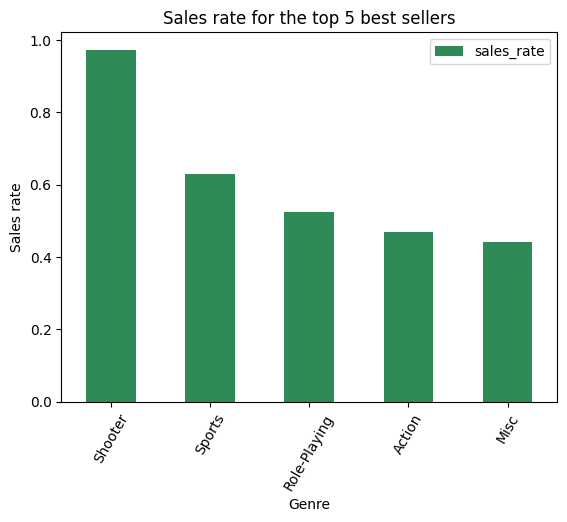

In [68]:
top_genres.plot(x = 'genre', 
              y = 'sales_rate',
              xlabel = 'Genre',
              ylabel = 'Sales rate',
              kind='bar',
             title = 'Sales rate for the top 5 best sellers',
              rot = 60,
                color = 'seagreen'
             )

Como podemos observar en ésta nueva gráfica, ahora nuestro orden ha cambiado, ya que, en realidad los videojuegos mas rentables son los del tipo 'Shooter' seguido de los 'Sports' porque lograron generar una mayor cantidad de ventas con menos lanzamientos. Lo que sugiere que tienen una base de seguidores sólida y una alta demanda. 

Incluso, si observamos la tabla mgd_genre_df ordenada de acuerdo a los valores de 'sales_rate' podemos darnos cuenta que contrario a lo que nos decía la gráfica inicial, 'Action' no es un género tan rentable, ya que, se encuentra a la mitad de la tabla, lo cual sugiere que tienen mucha oferta en estos videojuegos pero una demanda un tanto baja y que su alto aporte a las ventas totales de la empresa se debe mas a un 'efecto de acumulación' que a la preferencia misma de los usuarios.

##### ¿QUE TIENEN EN COMÚN LOS GÉNEROS MAS RENTABLES?

Todos éstos géneros tienen en común que permiten que el usuario se relaje con una mayor facilidad por lo que ofrece cada uno de ellos, por ejemplo:

Los géneros 'Shooter' le generan una satisfacción al usuario cada que genera una baja hacia un enemigo, sobre todo si éste tiene acceso a la modalidad online.

'Sports' permite que el usuario sienta que stá siendo activo jugando virtualmente su deporte favorito, sobre todo en plataformas que ofrecen movilidad virtual como Kinect o Wii Sports donde tienes que simular el moviemiento corporal para que tu personaje lo haga.

'Role-Playing' , 'Action' y 'Misc' ofrecen una buena experiencia a través de la historia que cuentan en el videojuego, teniendo la ventaja de que si es una buena narrativa puede enganchar muy fácilmente al jugador.

#### VIDEOJUEGOS MENOS RENTABLES

In [69]:
#Filtrar dataset 'mgd_genre_df' de acuerdo a las 5 categorias mas vendidas en 'genre_df', ordenado en base a 'sales_rate'
tail_genres = mgd_genre_df[mgd_genre_df['genre'].isin(genre_df['genre'].tail())].sort_values(by='sales_rate', 
                                                                                            ascending = False)
#Mostrar dataset filtrado
tail_genres

,genre,total_sales,sales_registers,sales_rate
8,Fighting,188.42,413,0.456223
7,Simulation,220.65,606,0.364109
10,Puzzle,89.92,366,0.245683
11,Strategy,73.14,393,0.186107
9,Adventure,141.35,1023,0.138172


<AxesSubplot:title={'center':'Sales rate for the top 5 best sellers'}, xlabel='Genre', ylabel='Sales rate'>

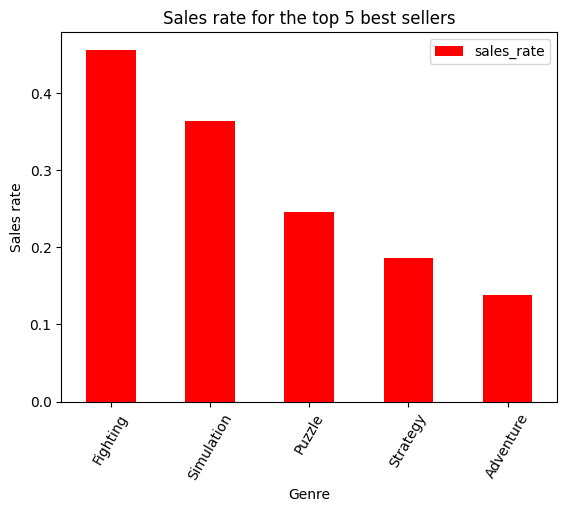

In [70]:
#Generar gráfico para 'tail_genres'
tail_genres.plot(x = 'genre', 
              y = 'sales_rate',
              xlabel = 'Genre',
              ylabel = 'Sales rate',
              kind='bar',
             title = 'Sales rate for the top 5 best sellers',
              rot = 60,
             color = 'red'
             )

Contrario a lo que observamos para los géneros más rentables, al analizar la tabla 'mgd_genre_df' coinciden 4 de los 5 juegos menos vendidos que la gráfica deventas totales nos muestra, a pesar de que el orden en ésta nueva gráfica cambia los géneros son los mismos, sin embargo, algo a resaltar es que 'Figthing' es un género más rentable de lo que se podría creer basado en la gráfica de ventas totales, asi como 'Adventure' es mucho menos rentable de lo que podemos concluir basados en la misma gráfica.

##### ¿QUE TIENEN EN COMÚN LOS GÉNEROS MENOS RENTABLES?


Todos éstos géneros tienen en común que requieren de una activa participación 'mental' del usuario, lo cual muchas veces puede llegar a desarrollar un menor interés, ya que, debido a esto puede que el usuario no logre relajarse tan fácilmente, por ejemplo, los juegos de 'Fighting', 'Simulation' pueden llevar a la monotonia generando que el usuario se aburra con mayor facilidad, los juegos de 'Puzzle' y 'Strategy' pueden llegar a ser complicados y frustrar al usuario mientras que los de 'Adventure' si ofrecen un mapa demasiado abierto, puede que el usuario tenga el sentimiento de saturación al no saber que explorar primero por tantas opciones que tiene disponibles, además de que en este tipo de juegos es común que a veces visites el mismo lugar con frecuencia porque el usuario se pierde o por ser un punto 'común' para ir a un nuevo camino inexplorado que puede generar tambien cierta 'monotonia'.

## PERFIL DEL USUARIO POR REGIÓN

Para crear un perfil de nuestros usuarios para cada una de las regiones (na, eu y jp) debemos analizar cuales son las plataformas y géneros principales, asi como cla forma en que las clasificaciones ESRB afectan a las ventas para cada una de ellas.

### PERFIL PARA USUARIOS DE NORTEAMERICA (na)

#### PLATAFORMAS PRINCIPALES

In [71]:
#Agrupación por plataforma y ordenamiento de acuerdo a 'na_sales'
na_pltf_df = ltst_games_info.groupby('platform')['na_sales'].sum().sort_values(ascending = False)

#Conversión de Serie a DataFrame
na_pltf_df = pd.DataFrame(na_pltf_df)

#Reseteo de índices 
na_pltf_df.reset_index(inplace= True)

#Mostrar dataset
na_pltf_df

,platform,na_sales
0,X360,588.84
1,Wii,486.87
2,PS3,390.13
3,DS,323.99
4,PS2,114.89
5,PS4,108.74
6,XOne,93.12
7,3DS,82.65
8,PSP,80.54
9,PC,44.45


<AxesSubplot:title={'center':'Total sales in miliion dollars per platform for North America '}, xlabel='Platform', ylabel='Sales in North America'>

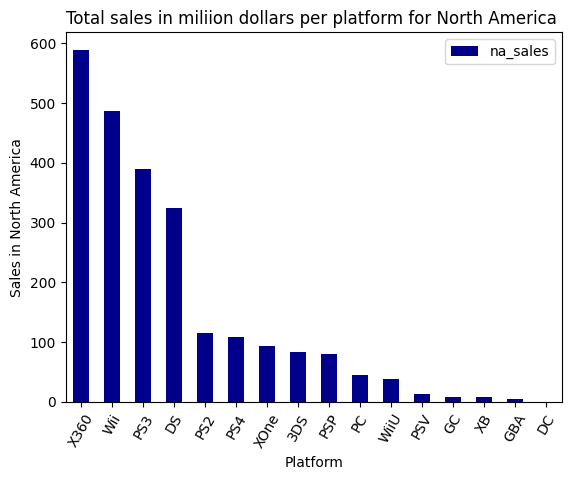

In [72]:
#Generar gráfico para 'tail_genres'
na_pltf_df.plot(x = 'platform', 
              y = 'na_sales',
              xlabel = 'Platform',
              ylabel = 'Sales in North America',
              kind='bar',
             title = 'Total sales in miliion dollars per platform for North America ',
              rot = 60,
             color = 'darkblue'
             )

#### GÉNEROS PRINCIPALES

In [73]:
#Agrupación por plataforma y ordenamiento de acuerdo a 'na_sales'
na_gen_df = ltst_games_info.groupby('genre')['na_sales'].sum().sort_values(ascending = False)

#Conversión de Serie a DataFrame
na_gen_df = pd.DataFrame(na_gen_df)

#Reseteo de índices 
na_gen_df.reset_index(inplace= True)

#Mostrar dataset
na_gen_df

,genre,na_sales
0,Action,530.44
1,Sports,396.64
2,Shooter,373.13
3,Misc,285.06
4,Role-Playing,199.63
5,Platform,134.25
6,Racing,132.93
7,Simulation,107.79
8,Fighting,94.31
9,Adventure,61.52


<AxesSubplot:title={'center':'Total sales in miliion dollars per genre for North America '}, xlabel='Genre', ylabel='Sales in North America'>

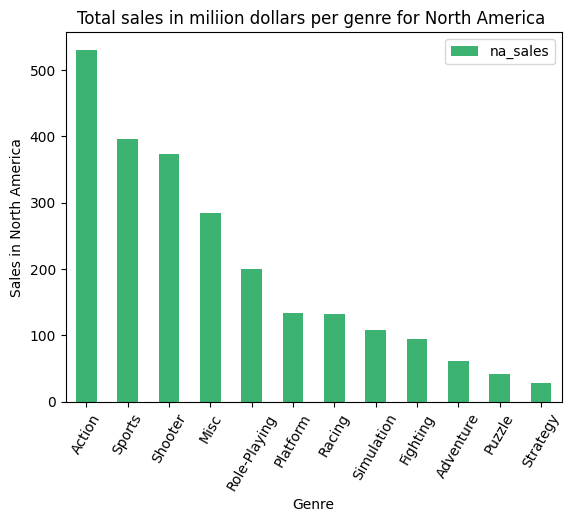

In [74]:
#Generar gráfico para 'tail_genres'
na_gen_df.plot(x = 'genre', 
              y = 'na_sales',
              xlabel = 'Genre',
              ylabel = 'Sales in North America',
              kind='bar',
             title = 'Total sales in miliion dollars per genre for North America ',
              rot = 60,
             color = 'mediumseagreen'
             )

#### EFECTO DE LAS CLASIFICACIONES ESRB

Dado que nuestras ventas totales son una variable numérica y nuestr rating es categórica no podemos caLcular la correlación que existe entre ambas, por lo tanto, debemos hacer uso de la prueba de hipótesis para los 4 principales rating con más ventas, partiendo desde la premisa en que para todas las poblaciones tendremos que:

                     H0: No hay diferencia significativa en las ventas totales entre las clasificaciones de ESRB.
                     H1: Existe una diferencia significativa en las ventas totales entre las clasificaciones de ESRB.
                     alpha = 5%

Para identificar a los 4 rating mas importantes debemos agrupar por la columna 'rating' y sumar 'total_sales' para ordenarlas de forma descendiente

In [75]:
#Dataset para norteamerica
na_df = ltst_games_info[ltst_games_info['na_sales']>0]

#Agrupación por 'rating' y suma de 'total_sales' ordenado en forma descendiente
ESRB_rates_na = na_df.groupby('rating')['total_sales'].sum().sort_values(ascending = False)

#Mostrar serie
ESRB_rates_na

rating
E           1523.59
M           1145.58
T            828.73
no rated     609.07
E10+         587.09
EC             1.40
Name: total_sales, dtype: float64

Para determinar el tamaño de las poblaciones debemos verificar el numero de veces que se registra cada categoria

In [76]:
ESRB_na_count = na_df.groupby('rating')['rating'].count().sort_values(ascending = False)
ESRB_na_count

rating
E           2231
T           1538
E10+        1191
no rated    1079
M            987
EC             6
Name: rating, dtype: int64

Necesitamos un dataset para cada categoría y poder tomar las muestras poblacionales

In [77]:
#DataFrame para 'E'
e_df_na = na_df[na_df['rating']=='E']

#DataFrame para 'M'
m_df_na = na_df[na_df['rating']=='M']

#DataFrame para 'no rated'
nrt_df_na = na_df[na_df['rating']=='no rated']

#DataFrame para 'T'
t_df_na = na_df[na_df['rating']=='T']

Ahora que conocemos el tamaño de cada categoria, podemos definir a nuestras poblaciones. Considerando que el registro menor de nuestras 4 rating principales es el de 'M' con 1100 registros, tomaremos una muestra de 900 datos aleatorios para conservar un poco la aleatoriedad de los mismos. Por lo tanto, la inforamción a utilizar en las comparaciones será:

In [78]:
#Muestra para 'E' 
e_sample_na = e_df_na['total_sales'].sample(900, random_state = 1)

#Muestra para 'M' 
m_sample_na = m_df_na['total_sales'].sample(900, random_state = 1)

#Muestra para 'no rated' 
nrt_sample_na = nrt_df_na['total_sales'].sample(900, random_state = 1)

#Muestra para 'T' 
t_sample_na = t_df_na['total_sales'].sample(900, random_state = 1)

#Definición de alpha
alpha = 0.05

##### E vs M

In [79]:
#Realizar la prueba
results_em_na = st.ttest_ind(e_sample_na, m_sample_na)

#Imprimir el valor p de la prueba
print('Valor p:',results_em_na.pvalue)

#Comparación del valor p con alpha
if results_em_na.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 0.0005900161547970823
Rechazamos la hipótesis nula


Al rechazar la hipótesis nula podemos concluir que las diferencias observadas entre las ventas de 'M' y 'E' no se deben únicamente a la aleatoriedad de los datos. Hay una diferencia real y significativa entre las poblaciones.

##### E vs no rated

In [80]:
#Realizar la prueba
results_enr_na = st.ttest_ind(e_sample_na, nrt_sample_na)

#Imprimir el valor p de la prueba
print('Valor p:',results_enr_na.pvalue)

#Comparación del valor p con alpha
if results_enr_na.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 0.3379013464433741
No podemos rechazar la hipótesis nula


Al NO rechazar la hipótesis nula podemos concluir que las diferencias observadas entre las ventas de 'no rated' y 'T'  se deben a la aleatoriedad de los datos. Nay una diferencia real y significativa entre las poblaciones.

##### M vs no rated

In [81]:
#Realizar la prueba
results_mnr_na = st.ttest_ind(nrt_sample_na, m_sample_na)

#Imprimir el valor p de la prueba
print('Valor p:',results_mnr_na.pvalue)

#Comparación del valor p con alpha
if results_mnr_na.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 1.0725351398362528e-10
Rechazamos la hipótesis nula


Al rechazar la hipótesis nula podemos concluir que las diferencias observadas entre las ventas de 'M' y 'no rated' no se deben únicamente a la aleatoriedad de los datos. Hay una diferencia real y significativa entre las poblaciones.

##### no rated vs T

In [82]:
#Realizar la prueba
results_tnr_na = st.ttest_ind(nrt_sample_na, t_sample_na)

#Imprimir el valor p de la prueba
print('Valor p:',results_tnr_na.pvalue)

#Comparación del valor p con alpha
if results_tnr_na.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 0.2926775464507871
No podemos rechazar la hipótesis nula


Al NO rechazar la hipótesis nula podemos concluir que las diferencias observadas entre las ventas de 'no rated' y 'T'  se deben a la aleatoriedad de los datos. Nay una diferencia real y significativa entre las poblaciones.

##### CONCLUSIÓN

Dados los resultados mixtos obtenidos (2 H0 aceptadas y 2 rechazadas) NO podemos determinar que en realidad existe una influencia directa de los rating en las ventas de los videojuegos para los usuarios en Norte América, dominando el mercado los que pertenecen a las categorias 'Everyone' (E) y las que pertenecen a 'Mature +17' (M), sin embargo, podemos observarlo también en los géneros más vendidos (Action, Sports y Shooters) que usualmente entran en éstas dos categorias pueden sesgar un poco nuestros resultados.

### PERFIL PARA USUARIOS DE EUROPA (eu)

#### PLATAFORMAS PRINCIPALES

In [83]:
#Agrupación por plataforma y ordenamiento de acuerdo a 'na_sales'
eu_pltf_df = ltst_games_info.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)

#Conversión de Serie a DataFrame
eu_pltf_df = pd.DataFrame(eu_pltf_df)

#Reseteo de índices 
eu_pltf_df.reset_index(inplace= True)

#Mostrar dataset
eu_pltf_df

,platform,eu_sales
0,PS3,327.21
1,X360,267.89
2,Wii,258.32
3,DS,142.99
4,PS4,141.09
5,PC,100.32
6,3DS,61.27
7,PSP,54.21
8,XOne,51.59
9,PS2,46.28


<AxesSubplot:title={'center':'Total sales in miliion dollars per platform for Europe'}, xlabel='Platform', ylabel='Sales in Europe'>

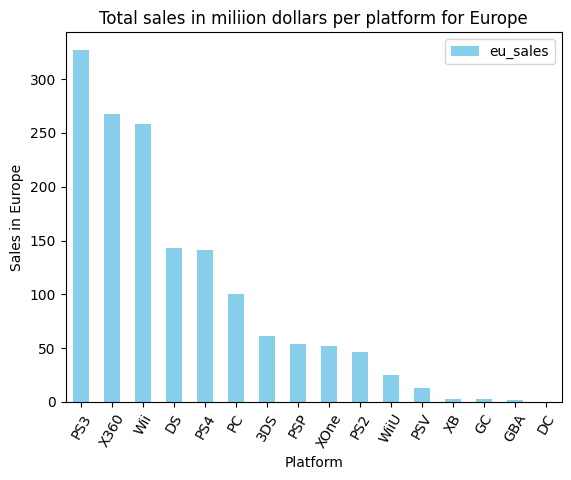

In [84]:
#Generar gráfico para 'tail_genres'
eu_pltf_df.plot(x = 'platform', 
              y = 'eu_sales',
              xlabel = 'Platform',
              ylabel = 'Sales in Europe',
              kind='bar',
             title = 'Total sales in miliion dollars per platform for Europe',
              rot = 60,
             color = 'skyblue'
             )

#### GÉNEROS PRINCIPALES

In [85]:
#Agrupación por plataforma y ordenamiento de acuerdo a 'na_sales'
eu_gen_df = ltst_games_info.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)

#Conversión de Serie a DataFrame
eu_gen_df = pd.DataFrame(eu_gen_df)

#Reseteo de índices 
eu_gen_df.reset_index(inplace= True)

#Mostrar dataset
eu_gen_df

,genre,eu_sales
0,Action,350.70
1,Sports,251.55
2,Shooter,238.89
3,Misc,146.88
4,Racing,113.39
5,Role-Playing,110.62
6,Platform,81.62
7,Simulation,69.74
8,Fighting,42.63
9,Adventure,37.90


<AxesSubplot:title={'center':'Total sales in miliion dollars per genre for Europe'}, xlabel='Genre', ylabel='Sales in Europe'>

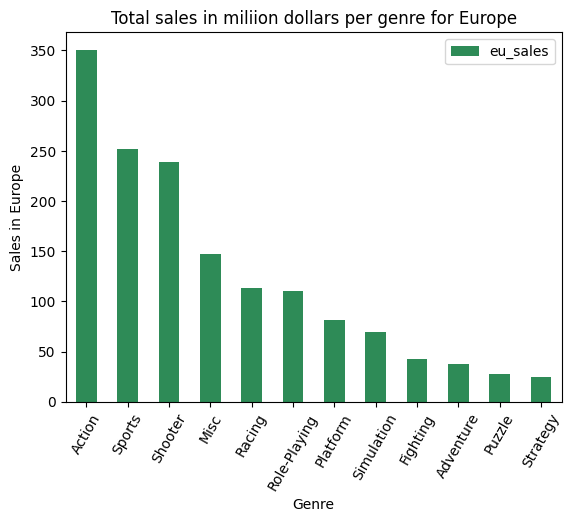

In [86]:
#Generar gráfico para 'tail_genres'
eu_gen_df.plot(x = 'genre', 
              y = 'eu_sales',
              xlabel = 'Genre',
              ylabel = 'Sales in Europe',
              kind='bar',
             title = 'Total sales in miliion dollars per genre for Europe',
              rot = 60,
             color = 'seagreen'
             )

#### EFECTO DE LAS CLASIFICACIONES ESRB

Dado que nuestras ventas totales son una variable numérica y nuestr rating es categórica no podemos caLcular la correlación que existe entre ambas, por lo tanto, debemos hacer uso de la prueba de hipótesis para los 4 principales rating con más ventas, partiendo desde la premisa en que para todas las poblaciones tendremos que:

                     H0: No hay diferencia significativa en las ventas totales entre las clasificaciones de ESRB.
                     H1: Existe una diferencia significativa en las ventas totales entre las clasificaciones de ESRB.
                     alpha = 5%

Para identificar a los 4 rating mas importantes debemos agrupar por la columna 'rating' y sumar 'total_sales' para ordenarlas de forma descendiente

In [87]:
#Dataset para norteamerica
eu_df = ltst_games_info[ltst_games_info['eu_sales']>0]

#Agrupación por 'rating' y suma de 'total_sales' ordenado en forma descendiente
ESRB_rates_eu = eu_df.groupby('rating')['total_sales'].sum().sort_values(ascending = False)

#Mostrar serie
ESRB_rates_eu

rating
E           1367.19
M           1148.59
T            785.85
no rated     605.80
E10+         547.61
RP             0.04
Name: total_sales, dtype: float64

Para determinar el tamaño de las poblaciones debemos verificar el numero de veces que se registra cada categoria

In [88]:
ESRB_eu_count = eu_df.groupby('rating')['rating'].count().sort_values(ascending = False)
ESRB_eu_count

rating
E           1460
T           1363
no rated    1137
M           1016
E10+         926
RP             1
Name: rating, dtype: int64

Necesitamos un dataset para cada categoría y poder tomar las muestras poblacionales

In [89]:
#DataFrame para 'E'
e_df_eu = eu_df[eu_df['rating']=='E']

#DataFrame para 'M'
m_df_eu = eu_df[eu_df['rating']=='M']

#DataFrame para 'no rated'
nrt_df_eu = eu_df[eu_df['rating']=='no rated']

#DataFrame para 'T'
t_df_eu = eu_df[eu_df['rating']=='T']

Ahora que conocemos el tamaño de cada categoria, podemos definir a nuestras poblaciones. Considerando que el registro menor de nuestras 4 rating principales es el de 'M' con 1016 registros, tomaremos una muestra de 800 datos aleatorios para conservar un poco la aleatoriedad de los mismos. Por lo tanto, la inforamción a utilizar en las comparaciones será:

In [90]:
#Muestra para 'E' 
e_sample_eu = e_df_eu['total_sales'].sample(800, random_state = 1)

#Muestra para 'M' 
m_sample_eu = m_df_eu['total_sales'].sample(800, random_state = 1)

#Muestra para 'no rated' 
nrt_sample_eu = nrt_df_eu['total_sales'].sample(800, random_state = 1)

#Muestra para 'T' 
t_sample_eu = t_df_eu['total_sales'].sample(800, random_state = 1)

#Definición de alpha
alpha = 0.05

##### E vs M

In [91]:
#Realizar la prueba
results_em_eu = st.ttest_ind(e_sample_eu, m_sample_eu)

#Imprimir el valor p de la prueba
print('Valor p:',results_em_eu.pvalue)

#Comparación del valor p con alpha
if results_em_eu.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 0.027299986393174235
Rechazamos la hipótesis nula


Al rechazar la hipótesis nula podemos concluir que las diferencias observadas entre las ventas de 'M' y 'E' no se deben únicamente a la aleatoriedad de los datos. Hay una diferencia real y significativa entre las poblaciones.

##### E vs no rated

In [92]:
#Realizar la prueba
results_enr_eu = st.ttest_ind(e_sample_eu, nrt_sample_eu)

#Imprimir el valor p de la prueba
print('Valor p:',results_enr_eu.pvalue)

#Comparación del valor p con alpha
if results_enr_eu.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 0.0010166172216480877
Rechazamos la hipótesis nula


Al rechazar la hipótesis nula podemos concluir que las diferencias observadas entre las ventas de 'E' y 'no rated' no se deben únicamente a la aleatoriedad de los datos. Hay una diferencia real y significativa entre las poblaciones.

##### M vs no rated

In [93]:
#Realizar la prueba
results_mnr_eu = st.ttest_ind(nrt_sample_eu, m_sample_eu)

#Imprimir el valor p de la prueba
print('Valor p:',results_mnr_eu.pvalue)

#Comparación del valor p con alpha
if results_mnr_eu.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 1.7814030670176835e-10
Rechazamos la hipótesis nula


Al rechazar la hipótesis nula podemos concluir que las diferencias observadas entre las ventas de 'M' y 'no rated' no se deben únicamente a la aleatoriedad de los datos. Hay una diferencia real y significativa entre las poblaciones.

##### no rated vs T

In [94]:
#Realizar la prueba
results_tnr_eu = st.ttest_ind(nrt_sample_eu, t_sample_eu)

#Imprimir el valor p de la prueba
print('Valor p:',results_tnr_eu.pvalue)

#Comparación del valor p con alpha
if results_tnr_eu.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 0.5458056102529362
No podemos rechazar la hipótesis nula


Al NO rechazar la hipótesis nula podemos concluir que las diferencias observadas entre las ventas de 'no rated' y 'T'  se deben a la aleatoriedad de los datos. Nay una diferencia real y significativa entre las poblaciones.

##### CONCLUSIÓN

Dados los resultados mixtos obtenidos (1 H0 aceptadas y 3 rechazadas) podemos determinar casi con certeza (debido a que la única comparación que NO rechaza la H0 incluye a 'no rated') que en realidad SI existe una influencia directa de los rating en las ventas de los videojuegos para los usuarios en Europa, dominando el mercado los que pertenecen a las categorias 'Everyone' (E) y las que pertenecen a 'Teen' (T), sin embargo, podemos observarlo también en los géneros más vendidos (Action y Sports) que usualmente algunos juegos entran en éstas dos categorias pueden sesgar un poco nuestros resultados y nos ayuda a confirmar un poco la influencia del rating en el mercado europeo. 

### PERFIL PARA USUARIO DE JAPÓN (jp)

#### PLATAFORMAS PRINCIPALES

In [95]:
#Agrupación por plataforma y ordenamiento de acuerdo a 'na_sales'
jp_pltf_df = ltst_games_info.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)

#Conversión de Serie a DataFrame
jp_pltf_df = pd.DataFrame(jp_pltf_df)

#Reseteo de índices 
jp_pltf_df.reset_index(inplace= True)

#Mostrar dataset
jp_pltf_df

,platform,jp_sales
0,DS,141.49
1,3DS,100.62
2,PS3,79.41
3,PSP,70.63
4,Wii,68.28
5,PS2,35.93
6,PSV,21.84
7,PS4,15.96
8,WiiU,13.01
9,X360,12.02


<AxesSubplot:title={'center':'Total sales in miliion dollars per platform for Japan'}, xlabel='Platform', ylabel='Sales in Japan'>

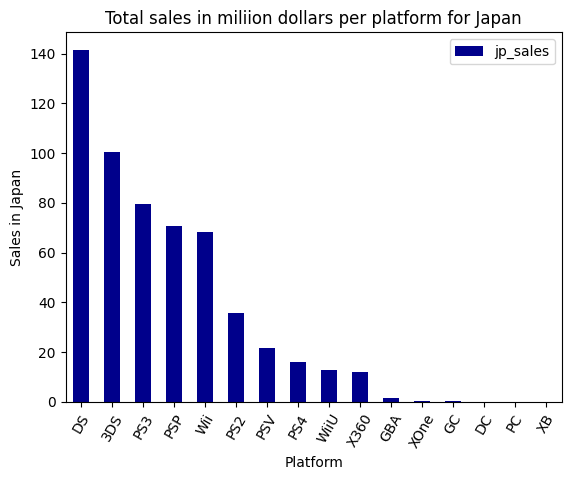

In [96]:
#Generar gráfico para 'tail_genres'
jp_pltf_df.plot(x = 'platform', 
              y = 'jp_sales',
              xlabel = 'Platform',
              ylabel = 'Sales in Japan',
              kind='bar',
             title = 'Total sales in miliion dollars per platform for Japan',
              rot = 60,
             color = 'darkblue'
             )

#### GÉNEROS PRINCIPALES

In [97]:
#Agrupación por plataforma y ordenamiento de acuerdo a 'na_sales'
jp_gen_df = ltst_games_info.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)

#Conversión de Serie a DataFrame
jp_gen_df = pd.DataFrame(jp_gen_df)

#Reseteo de índices 
jp_gen_df.reset_index(inplace= True)

#Mostrar dataset
jp_gen_df

,genre,jp_sales
0,Role-Playing,170.38
1,Action,102.07
2,Misc,64.53
3,Sports,48.97
4,Platform,35.20
5,Adventure,29.53
6,Fighting,28.61
7,Simulation,23.31
8,Shooter,19.35
9,Strategy,13.73


<AxesSubplot:title={'center':'Total sales in miliion dollars per genre for Japan'}, xlabel='Genre', ylabel='Sales in Japan'>

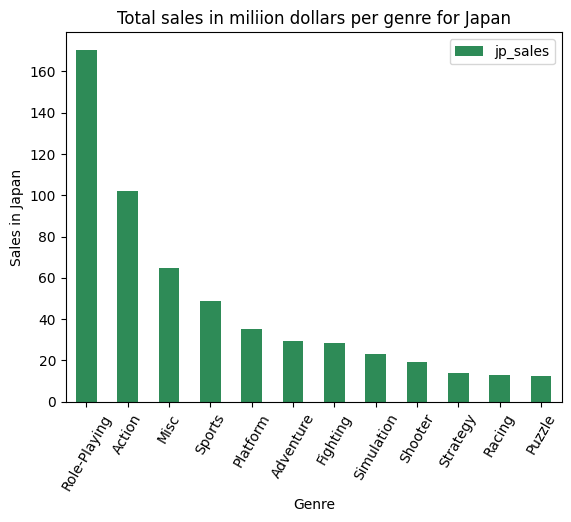

In [98]:
#Generar gráfico para 'tail_genres'
jp_gen_df.plot(x = 'genre', 
              y = 'jp_sales',
              xlabel = 'Genre',
              ylabel = 'Sales in Japan',
              kind='bar',
             title = 'Total sales in miliion dollars per genre for Japan',
              rot = 60,
             color = 'seagreen'
             )

#### EFECTO DE LAS CLASIFICACIONES ESRB

Dado que nuestras ventas totales son una variable numérica y nuestr rating es categórica no podemos caLcular la correlación que existe entre ambas, por lo tanto, debemos hacer uso de la prueba de hipótesis para los 4 principales rating con más ventas, partiendo desde la premisa en que para todas las poblaciones tendremos que:

                     H0: No hay diferencia significativa en las ventas totales entre las clasificaciones de ESRB.
                     H1: Existe una diferencia significativa en las ventas totales entre las clasificaciones de ESRB.
                     alpha = 5%

Para identificar a los 4 rating mas importantes debemos agrupar por la columna 'rating' y sumar 'total_sales' para ordenarlas de forma descendiente

In [99]:
#Dataset para norteamerica
jp_df = ltst_games_info[ltst_games_info['jp_sales']>0]

#Agrupación por 'rating' y suma de 'total_sales' ordenado en forma descendiente
ESRB_rates_jp = jp_df.groupby('rating')['total_sales'].sum().sort_values(ascending = False)

#Mostrar serie
ESRB_rates_jp

rating
M           903.42
E           887.34
no rated    586.46
T           458.22
E10+        202.45
Name: total_sales, dtype: float64

Para determinar el tamaño de las poblaciones debemos verificar el numero de veces que se registra cada categoria

In [100]:
ESRB_jp_count = jp_df.groupby('rating')['rating'].count().sort_values(ascending = False)
ESRB_jp_count

rating
no rated    2508
T            645
M            476
E            364
E10+         224
Name: rating, dtype: int64

Necesitamos un dataset para cada categoría y poder tomar las muestras poblacionales

In [101]:
#DataFrame para 'E'
e_df_jp = jp_df[jp_df['rating']=='E']

#DataFrame para 'M'
m_df_jp = jp_df[jp_df['rating']=='M']

#DataFrame para 'no rated'
nrt_df_jp = jp_df[jp_df['rating']=='no rated']

#DataFrame para 'T'
t_df_jp = jp_df[jp_df['rating']=='T']

Ahora que conocemos el tamaño de cada categoria, podemos definir a nuestras poblaciones. Considerando que el registro menor de nuestras 4 rating principales es el de 'M' con 364 registros, tomaremos una muestra de 200 datos aleatorios para conservar un poco la aleatoriedad de los mismos. Por lo tanto, la inforamción a utilizar en las comparaciones será:

In [102]:
#Muestra para 'E' 
e_sample_jp = e_df_jp['total_sales'].sample(200, random_state = 1)

#Muestra para 'M' 
m_sample_jp = m_df_jp['total_sales'].sample(200, random_state = 1)

#Muestra para 'no rated' 
nrt_sample_jp = nrt_df_jp['total_sales'].sample(200, random_state = 1)

#Muestra para 'T' 
t_sample_jp = t_df_jp['total_sales'].sample(200, random_state = 1)

#Definición de alpha
alpha = 0.05

##### E vs M

In [103]:
#Realizar la prueba
results_em_jp = st.ttest_ind(e_sample_jp, m_sample_jp)

#Imprimir el valor p de la prueba
print('Valor p:',results_em_jp.pvalue)

#Comparación del valor p con alpha
if results_em_jp.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 0.07931181783603508
No podemos rechazar la hipótesis nula


Al NO rechazar la hipótesis nula podemos concluir que las diferencias observadas entre las ventas de 'E y 'M'  se deben a la aleatoriedad de los datos. Nay una diferencia real y significativa entre las poblaciones.

##### E vs no rated

In [104]:
#Realizar la prueba
results_enr_jp = st.ttest_ind(e_sample_jp, nrt_sample_jp)

#Imprimir el valor p de la prueba
print('Valor p:',results_enr_jp.pvalue)

#Comparación del valor p con alpha
if results_enr_jp.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 1.3580649286589997e-06
Rechazamos la hipótesis nula


Al rechazar la hipótesis nula podemos concluir que las diferencias observadas entre las ventas de 'E' y 'no rated' no se deben únicamente a la aleatoriedad de los datos. Hay una diferencia real y significativa entre las poblaciones.

##### M vs no rated

In [105]:
#Realizar la prueba
results_mnr_jp = st.ttest_ind(nrt_sample_jp, m_sample_jp)

#Imprimir el valor p de la prueba
print('Valor p:',results_mnr_jp.pvalue)

#Comparación del valor p con alpha
if results_mnr_jp.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 5.041031232586479e-14
Rechazamos la hipótesis nula


Al rechazar la hipótesis nula podemos concluir que las diferencias observadas entre las ventas de 'M' y 'no rated' no se deben únicamente a la aleatoriedad de los datos. Hay una diferencia real y significativa entre las poblaciones.

##### no rated vs T

In [106]:
#Realizar la prueba
results_tnr_jp = st.ttest_ind(nrt_sample_jp, t_sample_jp)

#Imprimir el valor p de la prueba
print('Valor p:',results_tnr_jp.pvalue)

#Comparación del valor p con alpha
if results_tnr_jp.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 9.712684678348012e-05
Rechazamos la hipótesis nula


Al rechazar la hipótesis nula podemos concluir que las diferencias observadas entre las ventas de 'T' y 'no rated' no se deben únicamente a la aleatoriedad de los datos. Hay una diferencia real y significativa entre las poblaciones.

##### CONCLUSIÓN

Dados los resultados mixtos obtenidos (1 H0 aceptadas y 3 rechazadas) podemos determinar casi con certeza (debido a que la única comparación que NO rechaza la H0 incluye a 'no rated') que en realidad SI existe una influencia directa de los rating en las ventas de los videojuegos para los usuarios en Japón, dominando el mercado los que pertenecen a las categorias 'Mature +17' (M) y las que pertenecen a 'Everyone' (E), sin embargo, podemos observarlo también en los géneros más vendidos (RPG, Action y Misc) que usualmente algunos juegos entran en éstas categorias pueden sesgar un poco nuestros resultados y nos ayuda a confirmar un poco la influencia del rating en el mercado japones. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

## PRUEBAS DE HIPÓTESIS EXTRA

### ¿LAS CLASIFICACIONES PROMEDIO DE LOS USUARIOS PARA XBOX ONE Y PC SON IGUALES?

Primero debemos generar los datasets a partir de los cuales obtendremos las muestras poblacionales

In [107]:
#Creación del Dataset para información de XboX One
xone_df = ltst_games_info[ltst_games_info['platform'] == 'XOne']

#Creación del Dataset para información de PC
pc_df = ltst_games_info[ltst_games_info['platform'] == 'PC']

Ahora debemos saber cuantos registros tiene cada uno y apartir de esa información poder determinar el tamaño de la muestra

In [108]:
#Conteo de los registros para 'user_score' en 'xone_df'
xone_reg_count = xone_df['user_score'].count()

#Mostrar conteo
xone_reg_count

247

In [109]:
#Conteo de los registros para 'user_score' en 'pc_df'
pc_reg_count = pc_df['user_score'].count()

#Mostrar conteo
pc_reg_count

776

Ya conocemos el registro de ambas columnas para cada dataset, por lo que al ser el número mínimo de registros con los que contamos es de 247 tomaremos un total de 150 registros para conservar un poco la aleatoriedad de los datos, lo cual se perdería para 'xone_df' si tomamos todos sus registros.

In [110]:
#Muestra para 'xone' en 'user_score'
xone_sample = xone_df['user_score'].sample(150, random_state = 1)

#Muestra para 'pc' en 'user_score'
pc_sample = pc_df['user_score'].sample(150, random_state = 1)

#Definición del nivel de significancia 'alpha'
alpha = 0.05

Una vez que contamos con toda nuestra información, debemos generar nuestra hipótesis, la cual será evaluada con un nivel de significancia del 5%.

                                    H0: 'user_score' en XOne = 'user_score' en PC
                                    H1: 'user_score' en XOne != 'user_score' en PC

In [111]:
#Realizar la prueba
results_xone_pc= st.ttest_ind(xone_sample, pc_sample)

#Imprimir el valor p de la prueba
print('Valor p:',results_xone_pc.pvalue)

#Comparación del valor p con alpha
if results_xone_pc.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 0.010507219398466303
Rechazamos la hipótesis nula


Nuestro resultado indica que no podemos rechazar la hipótesis nula, por lo tanto, concluimos que las medias entre las poblaciones no tienen diferencias significativas, lo cual indica una probabilidad de que dicha diferencia se deba a la aleatoriedad de los datos.

### ¿LAS CLASIFICACIONES PROMEDIO DE LOS USUARIOS PARA ACCIÓN Y DEPORTES SON DIFERNTES?

Primero debemos generar los datasets a partir de los cuales obtendremos las muestras poblacionales

In [112]:
#Creación del Dataset para información del género 'Action'
action_df = ltst_games_info[ltst_games_info['genre'] == 'Action']

#Creación del Dataset para información del género 'Sports'
sports_df = ltst_games_info[ltst_games_info['genre'] == 'Sports']

Ahora debemos saber cuantos registros tiene cada uno y apartir de esa información poder determinar el tamaño de la muestra

In [113]:
#Conteo de los registros para 'user_score' en 'action_df'
action_reg_count = action_df['user_score'].count()

#Mostrar conteo
action_reg_count

2382

In [114]:
#Conteo de los registros para 'user_score' en 'sports_df'
sports_reg_count = sports_df['user_score'].count()

#Mostrar conteo
sports_reg_count

1262

Ya conocemos el registro de ambas columnas para cada dataset, por lo que al ser el número mínimo de registros con los que contamos es de 1262 tomaremos un total de 1000 registros para conservar un poco la aleatoriedad de los datos, lo cual se perdería para 'sports_df' si tomamos todos sus registros.

In [115]:
#Muestra para 'action' en 'user_score'
action_sample = action_df['user_score'].sample(1000, random_state = 1)

#Muestra para 'sports' en 'user_score'
sports_sample = sports_df['user_score'].sample(1000, random_state = 1)

#Definición del nivel de significancia 'alpha'
alpha = 0.05

Una vez que contamos con toda nuestra información, debemos generar nuestra hipótesis, la cual será evaluada con un nivel de significancia del 5%.

                                    H0: 'user_score' en Action = 'user_score' en Sports
                                    H1: 'user_score' en Action != 'user_score' en Sports

In [116]:
#Realizar la prueba
results_action_sports = st.ttest_ind(action_sample, sports_sample)

#Imprimir el valor p de la prueba
print('Valor p:',results_action_sports.pvalue)

#Comparación del valor p con alpha
if results_action_sports.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 3.4849451620680216e-05
Rechazamos la hipótesis nula


Nuestro resultado indica que no podemos rechazar la hipótesis nula, por lo tanto, concluimos que las medias entre las poblaciones no tienen diferencias significativas, lo cual indica una probabilidad de que dicha diferencia se deba a la aleatoriedad de los datos.

## CONCLUSIÓN GENERAL DEL PROYECTO

El objetivo general de nuestro proyecto es identificar patrones que puedan ayudar a determinar si próximos lanzamientos en videojuegos serán exitosos o no, durante el desarrollo del mismo se fueron encontrando ciertos patrones que nos permiten desarrollar los siguientes puntos importantes:

    1. La fuerte correlación que existe entre las ventas en Norte América y Europa nos indica que ambos son un mercado bastante similar y que muy seguramente si un videojuego tiene éxito en uno, también lo tendrá en la otra región, es por eso que esto tambien se ve reflejado en el aporte de ambas regiones en las ventas globales.
    
    2. Las críticas de los usuarios y profesionales tienen una correlación alta entre sí, lo que indica que una tiene influencia sobre la otra, sin embargo, su baja correlación con las ventas nos demuestra que NO las afectan y que debemos considerar otros factores como el marketing.
    
    3. Las ventas en las plataformas tienen un comportamiento predecible:
    
    * Observamos que alcanzan su pico máximo de ventas al año siguiente de haber registrado su primer caída
               
    * El lanzamiento de nuevas generaciones de plataformas reduce el dinero generado por los videojuegos en las                     generaciones anteriores, esto porque los desarrolladores de videojuegos se adaptan a las nuevas teconologias para 
    ofrecer una mejor experiencia.
               
    * Cada plataforma dura aproximadamente 10 años generando ventas en videojuegos, posterior a éste tiempo terminan                   desapareciendo gracias a las nuevas.
    
    * En el caso de plataformas 'rivales' se puede presentar una disminución en las ventas debido al mercado compartido con las demas marcas, sin embargo, algo que debemos tener en cuenta para estos casos es que las altas ventas están relacionados con los lanzamientos exclusivos para cada plataforma, los beneficios que tienen el obtener membresías para cada una de ellas y la experiencia de juego que ofrecen.
    
    4. Xbox y PlayStation dominan con claridad el mercado de los videojuegos en Norte América y Europa, mientras que el
    mercado japonés consume 'local', sus plataformas principales son Wii y DS, ambas pertenecientes a Nintendo. Lo cual se relaciona con el siguiente punto.
    
    5. El top 4 de plataformas con mayores ventas globales pertenece a plataformas con un lanzamiento reciente en 2006, nuestras dos primeras posiciones (PS3 y X360) dominaron con claridad el mercado y fueron mas constantes en sus ventas a comparación de las plataformas pertenecientes a las posiciones tres y cuatro (Wii y DS). Cabe destacar que mientras Wii y DS estaban prácticamente desaparecidas, nuestro top 2 seguía generando ventas en sus plataformas lo cual nos habla de la gran influencia y potencial del mercado norteamericano y europeo.
    
    6. Xbox y PlayStation cuentan con ventas bastante similares, sin embargo, podemos apreciar una clara preferencia del ususario hacia Xbox en videojuegos como 'Call of Duty' que pertenecen al género 'Shooters'  que generalmente se juegan en una modalidad online, mientras que PS tiene preferencia para juegos que se juegan de manera local como 'Grand Theft Auto'.
    
    7. Las diferencias entre las ventas en las plataformas de la misma compañia como Wii y DS presentan diferencias significativas, lo cual indica que los usuarios prefieren una plataforma estática (Wii) sobre una portatil (DS) posiblemente  por su experiencia de juego y catalogo disponible de videojuegos.
    
    8. Los géneros mas vendidos ('Shooter', 'Sports' y RPG') atrapan con mayor facilidad al usuario por la experiencia que ofrecen, ya que, pueden generar una satisfacción en situaciones como el generar una baja enemiga, sobre todo en modalidades online, que el usuario se sienta activo en los juegos de deportes donde la plataforma identifica y replica tu movimiento corporal o simplemente al seguir el desarrollo del personaje que manejas a través de una buena historia.
    
    9. Los géneros menos vendidos ('Puzzle','Estrategia', 'Aventura') pueden llegar a generar cierta frustración en el usuario si son demasiado complicados o si ofrecen una inmensa cantidad de cosas como mundos muy abiertos, lo cual puede generar el sentido de 'saturación' del usuario y alejarlos de éste tipo de juegos, llegando así a un mercado mas selecto y por ende, mas limitado.
    
    10. El rating ESRB dominante a nivel global son 'Mature +17' (M) y 'Everyone' (E), a pesar de ser 'opuestos', esto lo vemos reflejado en los géneros mas vendidos donde tenemos a 'Action' y 'Sports', los juegos desarrollados en estas categorias suelen tener esas clasificaciones, lo que indica que tenemos un publico un tanto mayor, posiblemente de la adolescencia en adelante.
    
    11. El rating ESRB no tiene influencia en las ventas de Norteamerica pero si en Europa y Japón, lo cual nos indica que las restricciones (ya sea paternales u oficiales) son un tanto mas estrictas en éstas regiones.
    